# Gandal disorder genes

In [1]:
%cd work/notebooks

/home/jovyan/work/notebooks


In [62]:
# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import sys, os
sys.path.append('../code')
from processing_helpers import *
from analysis_helpers import *
from gradientVersion import *
from mri_maps import *
from enrichments import *
from disorders import *
%R source("../code/enrichmentsPlots.R");
%R source("../code/plot_maps.R");

## Get gradients version with null weights

In [126]:
dm_hcp_3d_ds5 = gradientVersion().fit('hcp_3donors_ds5')

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [127]:
version = dm_hcp_3d_ds5
scores = version.clean_scores()
weights = version.weights.iloc[:, :3]

In [129]:
null_weights = shuffle_gene_weights(version.weights, n=2000, rank=False)

## SCZD differential gene enrichment

### Collado-Torres genes

In [29]:
collado = pd.read_csv("../data/colladotorres_sczd_genes.csv", index_col='Symbol', usecols=['Symbol', 'logFC', 't', 'P.Value', 'adj.P.Val'])

In [10]:
weights.join(collado.loc[lambda x: x['adj.P.Val'] < 0.05]).dropna().corr()

0         1         2     logFC         t   P.Value  \
0          1.000000  0.262749 -0.026441 -0.340616 -0.607181  0.021439   
1          0.262749  1.000000  0.136772 -0.334430 -0.450528  0.076666   
2         -0.026441  0.136772  1.000000 -0.329884 -0.238232  0.090130   
logFC     -0.340616 -0.334430 -0.329884  1.000000  0.829169 -0.158339   
t         -0.607181 -0.450528 -0.238232  0.829169  1.000000 -0.078642   
P.Value    0.021439  0.076666  0.090130 -0.158339 -0.078642  1.000000   
adj.P.Val  0.038932  0.020588  0.142189 -0.195529 -0.094164  0.831142   

           adj.P.Val  
0           0.038932  
1           0.020588  
2           0.142189  
logFC      -0.195529  
t          -0.094164  
P.Value     0.831142  
adj.P.Val   1.000000

### ACC genes – Ramaker

In [11]:
ramaker = pd.read_csv('../data/ramaker_genes.csv')
pritzker = ramaker[['gene', 'Pritzker_FoldChange', 'Pritzker_FDR']] \
    .set_index('gene').set_axis(['log2FC','FDR'], axis=1)
stanley = ramaker[['gene', 'Stanley_FoldChange', 'Stanley_FDR']] \
    .set_index('gene').set_axis(['log2FC','FDR'], axis=1)

acc_studies = pd.concat({
    'Pritzker 2017\n (RNAseq, n=48)': pritzker,
    'Stanley 2017\n (RNAseq, n=70)': stanley
    }).reset_index(0).rename({'level_0':'study'},axis=1)

In [12]:
acc_studies_corr = get_gene_corr2(weights, null_weights, acc_studies, group='study')
acc_studies_corr

/home/jovyan/work/notebooks/../code/disorders.py:153: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  _genes_log2FC = _genes_log2FC.loc[genes_matched].values
/home/jovyan/work/notebooks/../code/disorders.py:153: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  _genes_log2FC = _genes_log2FC.loc[genes_matched].values


label   G     pct  true_mean  null_mean  null_std  \
0  Pritzker 2017\n (RNAseq, n=48)  G1  0.0345  -0.084767  -0.000326  0.046087   
1  Pritzker 2017\n (RNAseq, n=48)  G2  0.0010  -0.145352  -0.000139  0.046243   
2  Pritzker 2017\n (RNAseq, n=48)  G3  1.0000   0.511171   0.000086  0.045906   
3   Stanley 2017\n (RNAseq, n=70)  G1  0.0100  -0.111859  -0.000597  0.047334   
4   Stanley 2017\n (RNAseq, n=70)  G2  0.0000  -0.187991  -0.000406  0.046326   
5   Stanley 2017\n (RNAseq, n=70)  G3  1.0000   0.495899   0.000078  0.046263   

           z    pos      p      q    sig  
0  -1.832219  False  0.069  0.069  False  
1  -3.140225  False  0.002  0.003   True  
2  11.133237   True  0.000  0.000   True  
3  -2.350589  False  0.020  0.024   True  
4  -4.049232  False  0.000  0.000   True  
5  10.717457   True  0.000  0.000   True

In [13]:
acc_studies_plot = acc_studies \
    .join(weights).dropna() \
    .rename({0:'G1',1:'G2',2:'G3'},axis=1) \
    .melt(id_vars=['study', 'log2FC', 'FDR'], var_name='G', value_name='weight') \
    .rename({'study':'label'},axis=1)
acc_studies_plot

label    log2FC       FDR   G    weight
0     Pritzker 2017\n (RNAseq, n=48) -0.191922  0.275233  G1 -0.005098
1      Stanley 2017\n (RNAseq, n=70) -0.228054  0.067515  G1 -0.005098
2     Pritzker 2017\n (RNAseq, n=48)  0.256410  0.221320  G1  0.005390
3      Stanley 2017\n (RNAseq, n=70)  0.409538  0.012855  G1  0.005390
4     Pritzker 2017\n (RNAseq, n=48)  0.355242  0.174203  G1 -0.011667
...                              ...       ...       ...  ..       ...
2797   Stanley 2017\n (RNAseq, n=70)  0.346691  0.182476  G3  0.000248
2798  Pritzker 2017\n (RNAseq, n=48) -0.264021  0.268886  G3 -0.012231
2799   Stanley 2017\n (RNAseq, n=70)  0.533989  0.013066  G3 -0.012231
2800  Pritzker 2017\n (RNAseq, n=48)  0.219384  0.211578  G3  0.005555
2801   Stanley 2017\n (RNAseq, n=70)  0.404105  0.050869  G3  0.005555

[2802 rows x 5 columns]

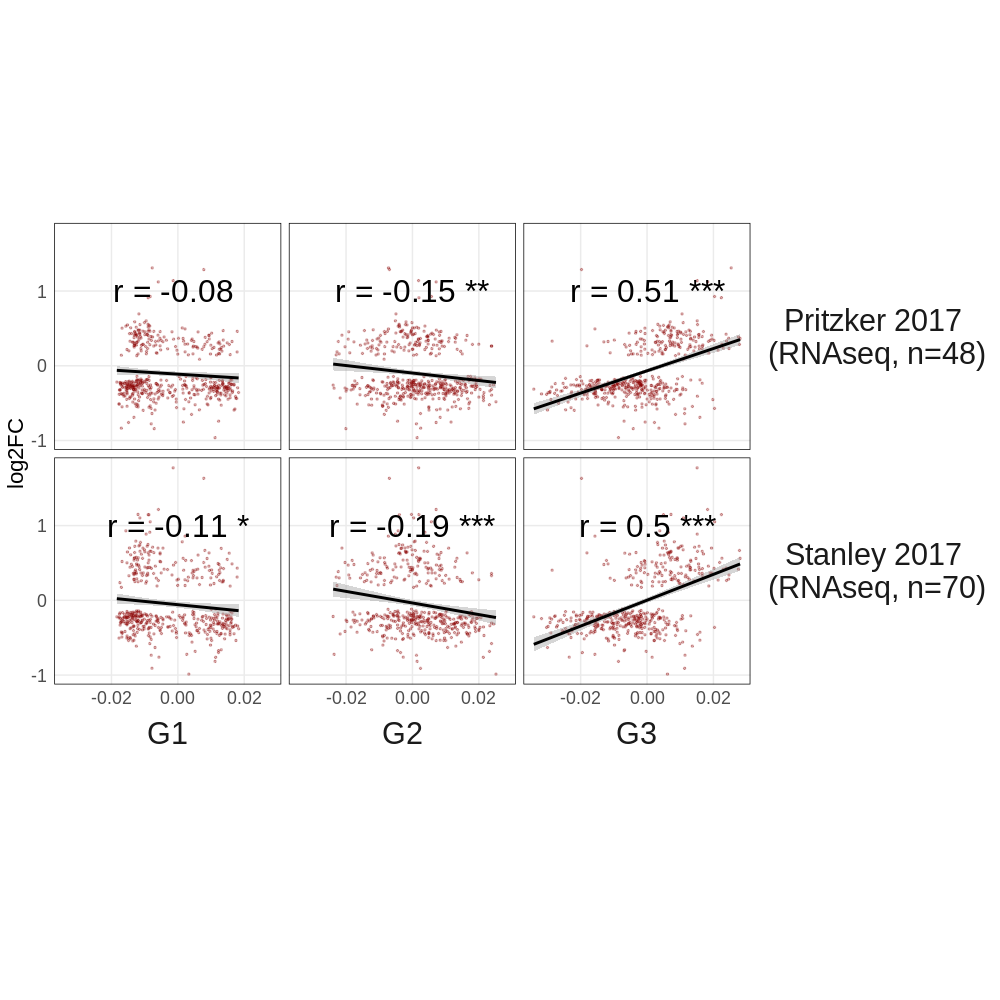

In [696]:
%%R -w 10 -h 10 --units in -r 100 -i acc_studies_plot -i acc_studies_corr
source("../code/enrichmentsPlots.R")
plot_log2FC(acc_studies_plot, acc_studies_corr)

### DLPFC – Gandal, PerezSantiago, Mistry

In [391]:
perezsantiago = (pd.read_csv('../data/perezsantiago_genes.csv') 
    .iloc[:,[1,4,5]].set_axis(['gene', 'FC', 'FDR'], axis=1) 
    .assign(FC = lambda x: x['FC'].str.replace("−", "-").astype('float')) 
    .assign(FC = lambda x: [1/-y if y<0 else y for y in x['FC']]) 
    .assign(log2FC=lambda x: np.log2(x['FC'])).drop('FC',axis=1)
    .loc[lambda x: x['FDR']<0.05]
)
perezsantiago.shape

(136, 3)

In [388]:
mistry = (pd.read_csv('../data/mistry_genes.csv') 
    .loc[:,['GeneSymbol', 'QvalueDown', 'FoldChange']] 
    .set_axis(['gene','FDR','FC'], axis=1) 
    .assign(log2FC = lambda x: np.log2(x['FC'])).drop('FC',axis=1)
    .loc[lambda x: x['FDR']<0.05]
)
mistry.shape

(24, 3)

In [392]:
gandal = (get_gandal_genes() 
    .loc[:, ['SCZ.log2FC', 'SCZ.FDR']] 
    .set_axis(['log2FC', 'FDR'], axis=1) 
    .reset_index() 
    .dropna().reset_index(drop=True) 
    .loc[lambda x: x['FDR']<0.05]
)
gandal.shape

(2037, 3)

In [394]:
gandal_rnaseq = (get_gandal_genes(which='rnaseq', disorders=['SCZ']) 
    .loc[:, ['SCZ.log2FC', 'SCZ.FDR']] 
    .set_axis(['log2FC', 'FDR'], axis=1) 
    .reset_index() 
    .dropna().reset_index(drop=True) 
    .loc[lambda x: x['FDR']<0.05]
)
gandal_rnaseq.shape

(4814, 3)

In [768]:
fromer = (pd.read_csv('../data/fromer_genes.csv') 
    .loc[:,['MAPPED_genes', 'logFC', 'adj.P.Val']] 
    .set_axis(['gene', 'log2FC', 'FDR'], axis=1) 
    .loc[lambda x: x['FDR']<0.1]
)
fromer.shape

(792, 3)

In [766]:
collado = (pd.read_csv("../data/colladotorres_sczd_genes.csv", 
    index_col='Symbol', usecols=['Symbol', 'logFC', 'adj.P.Val']) 
        .reset_index() 
        .set_axis(['gene','log2FC', 'FDR'], axis=1) 
        # .loc[lambda x: x['FDR']<0.05]
)
collado.shape

(733, 3)

In [400]:
# gandal.set_index('gene').join(gandal_rnaseq.set_index('gene'), rsuffix='_rna').corr()
collado.set_index('gene').join(gandal.set_index('gene'), rsuffix='_rna').corr()

log2FC       FDR  log2FC_rna   FDR_rna
log2FC      1.000000 -0.103327    0.826897 -0.054813
FDR        -0.103327  1.000000    0.020424  0.161086
log2FC_rna  0.826897  0.020424    1.000000 -0.065324
FDR_rna    -0.054813  0.161086   -0.065324  1.000000

In [401]:
dlpfc_studies = pd.concat({
    'Perez-Santiago 2012\n (MicroArr, n=264^)': perezsantiago,
    'Mistry 2013\n (MicroArr, n=306^)': mistry,
    'Gandal 2018\n (MicroArr, n=452)': gandal,
    'Gandal 2018\n (RNAseq, n=>1700)': gandal_rnaseq,
    'Fromer 2016\n (RNAseq, n=537)': fromer,
    'Collado-Torres 2019\n (RNAseq, n=551)': collado,
    }).reset_index(0).rename({'level_0':'study'},axis=1).set_index('gene') \
      .assign(study = lambda x: pd.Categorical(x['study'],ordered=True,categories=x['study'].unique()))

In [402]:
dlpfc_studies_corr = get_gene_corr2(weights, null_weights, dlpfc_studies, group='study')
dlpfc_studies_corr

label   G     pct  true_mean  \
0   Perez-Santiago 2012\n (MicroArr, n=264^)  G1  0.0230  -0.227573   
1   Perez-Santiago 2012\n (MicroArr, n=264^)  G2  0.3530  -0.039536   
2   Perez-Santiago 2012\n (MicroArr, n=264^)  G3  1.0000   0.422041   
3           Mistry 2013\n (MicroArr, n=306^)  G1  0.2290  -0.236046   
4           Mistry 2013\n (MicroArr, n=306^)  G2  0.7115   0.179497   
5           Mistry 2013\n (MicroArr, n=306^)  G3  0.6750   0.119162   
7            Gandal 2018\n (MicroArr, n=452)  G2  0.0000  -0.243984   
8            Gandal 2018\n (MicroArr, n=452)  G3  1.0000   0.453362   
6            Gandal 2018\n (MicroArr, n=452)  G1  0.0000  -0.382084   
9            Gandal 2018\n (RNAseq, n=>1700)  G1  0.0000  -0.239961   
10           Gandal 2018\n (RNAseq, n=>1700)  G2  0.0000  -0.158173   
11           Gandal 2018\n (RNAseq, n=>1700)  G3  0.1605  -0.021771   
12             Fromer 2016\n (RNAseq, n=537)  G1  0.0000  -0.585206   
13             Fromer 2016\n (RNAseq, n=537)  G2  0.0305  -0.106067   
14             Fromer 2016\n (RNAseq, n=537)  G3  0.9310   0.093850   
16     Collado-Torres 2019\n (RNAseq, n=551)  G2  0.0000  -0.366898   
15     Collado-Torres 2019\n (RNAseq, n=551)  G1  0.0000  -0.349276   
17     Collado-Torres 2019\n (RNAseq, n=551)  G3  0.0000  -0.318061   

    null_mean  null_std          z    pos      p         q    sig  
0   -0.000403  0.110614  -2.053725  False  0.046  0.075273  False  
1    0.001807  0.110091  -0.375533  False  0.706  0.706000  False  
2   -0.001203  0.109640   3.860292   True  0.000  0.000000   True  
3   -0.000621  0.293214  -0.802912  False  0.458  0.549600  False  
4   -0.002963  0.291216   0.626545   True  0.577  0.649125  False  
5   -0.015987  0.280465   0.481873   True  0.650  0.688235  False  
7   -0.000024  0.030860  -7.905380  False  0.000  0.000000   True  
8    0.000430  0.030881  14.666805   True  0.000  0.000000   True  
6    0.000372  0.029933 -12.777185  False  0.000  0.000000   True  
9    0.001052  0.021491 -11.214737  False  0.000  0.000000   True  
10  -0.000340  0.021400  -7.375357  False  0.000  0.000000   True  
11   0.000251  0.021779  -1.011176  False  0.321  0.412714  False  
12   0.001266  0.061534  -9.530833  False  0.000  0.000000   True  
13   0.001052  0.060559  -1.768832  False  0.061  0.091500  False  
14   0.000081  0.061024   1.536600   True  0.138  0.191077  False  
16   0.001322  0.075131  -4.901032  False  0.000  0.000000   True  
15  -0.000513  0.075212  -4.637082  False  0.000  0.000000   True  
17   0.000349  0.073568  -4.328118  False  0.000  0.000000   True

In [403]:
dlpfc_studies_plot = dlpfc_studies \
    .join(weights).dropna() \
    .rename({0:'G1',1:'G2',2:'G3'},axis=1) \
    .melt(id_vars=['study', 'log2FC', 'FDR'], var_name='G', value_name='weight') \
    .rename({'study':'label'},axis=1).sort_values('label')
dlpfc_studies_plot

label    log2FC       FDR   G  \
5841  Perez-Santiago 2012\n (MicroArr, n=264^)  0.321928  0.016600  G2   
6029  Perez-Santiago 2012\n (MicroArr, n=264^) -0.367371  0.013500  G2   
9373  Perez-Santiago 2012\n (MicroArr, n=264^)  0.400538  0.014800  G3   
9372  Perez-Santiago 2012\n (MicroArr, n=264^)  0.485427  0.003500  G3   
7576  Perez-Santiago 2012\n (MicroArr, n=264^) -0.286881  0.013100  G3   
...                                        ...       ...       ...  ..   
8946     Collado-Torres 2019\n (RNAseq, n=551)  0.081325  0.009415  G3   
3905     Collado-Torres 2019\n (RNAseq, n=551) -0.152594  0.005259  G2   
3212     Collado-Torres 2019\n (RNAseq, n=551)  0.102489  0.026334  G1   
5548     Collado-Torres 2019\n (RNAseq, n=551) -0.267267  0.030762  G2   
8912     Collado-Torres 2019\n (RNAseq, n=551) -0.428913  0.040117  G3   

        weight  
5841  0.004541  
6029  0.002429  
9373 -0.030761  
9372 -0.030761  
7576 -0.005945  
...        ...  
8946 -0.023316  
3905  0.006301  
3212 -0.015197  
5548  0.001915  
8912  0.013637  

[11316 rows x 5 columns]

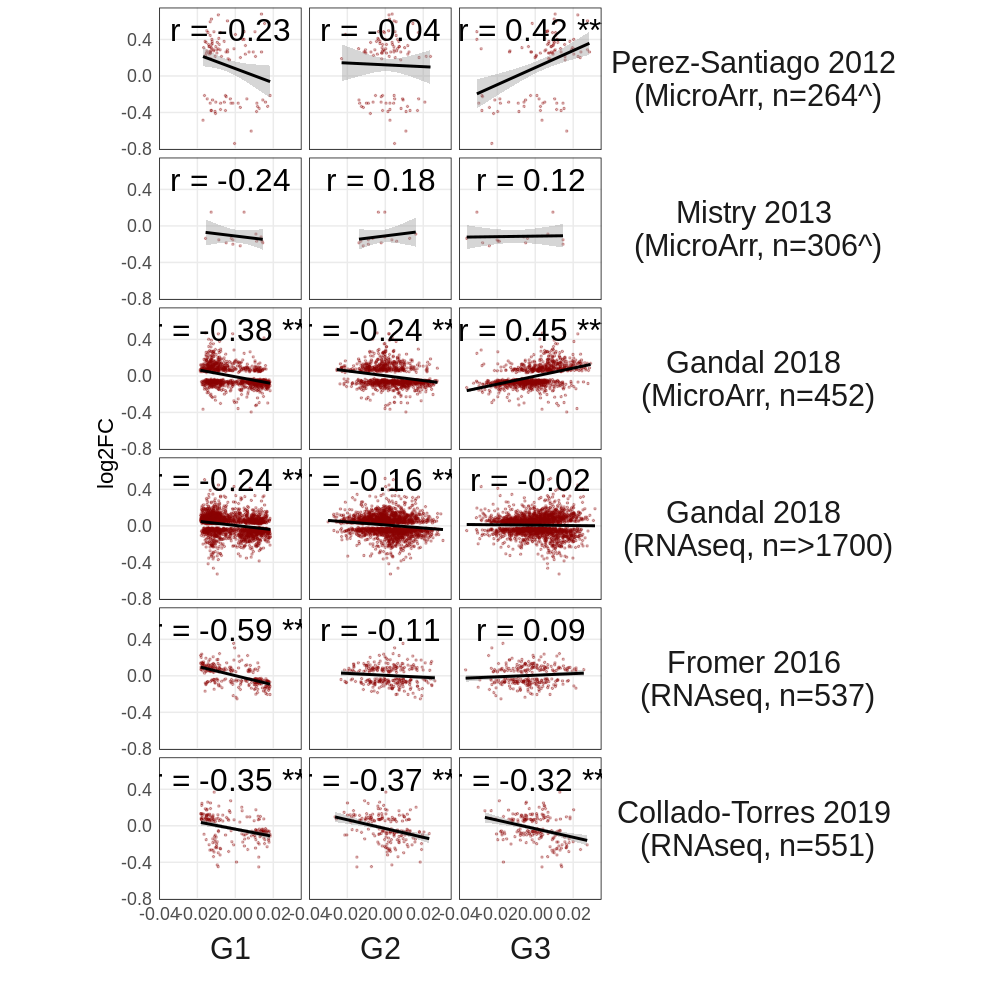

In [404]:
%%R -w 10 -h 10 --units in -r 100 -i dlpfc_studies_plot -i dlpfc_studies_corr
plot_log2FC(dlpfc_studies_plot, dlpfc_studies_corr, x=0, y=0.5)

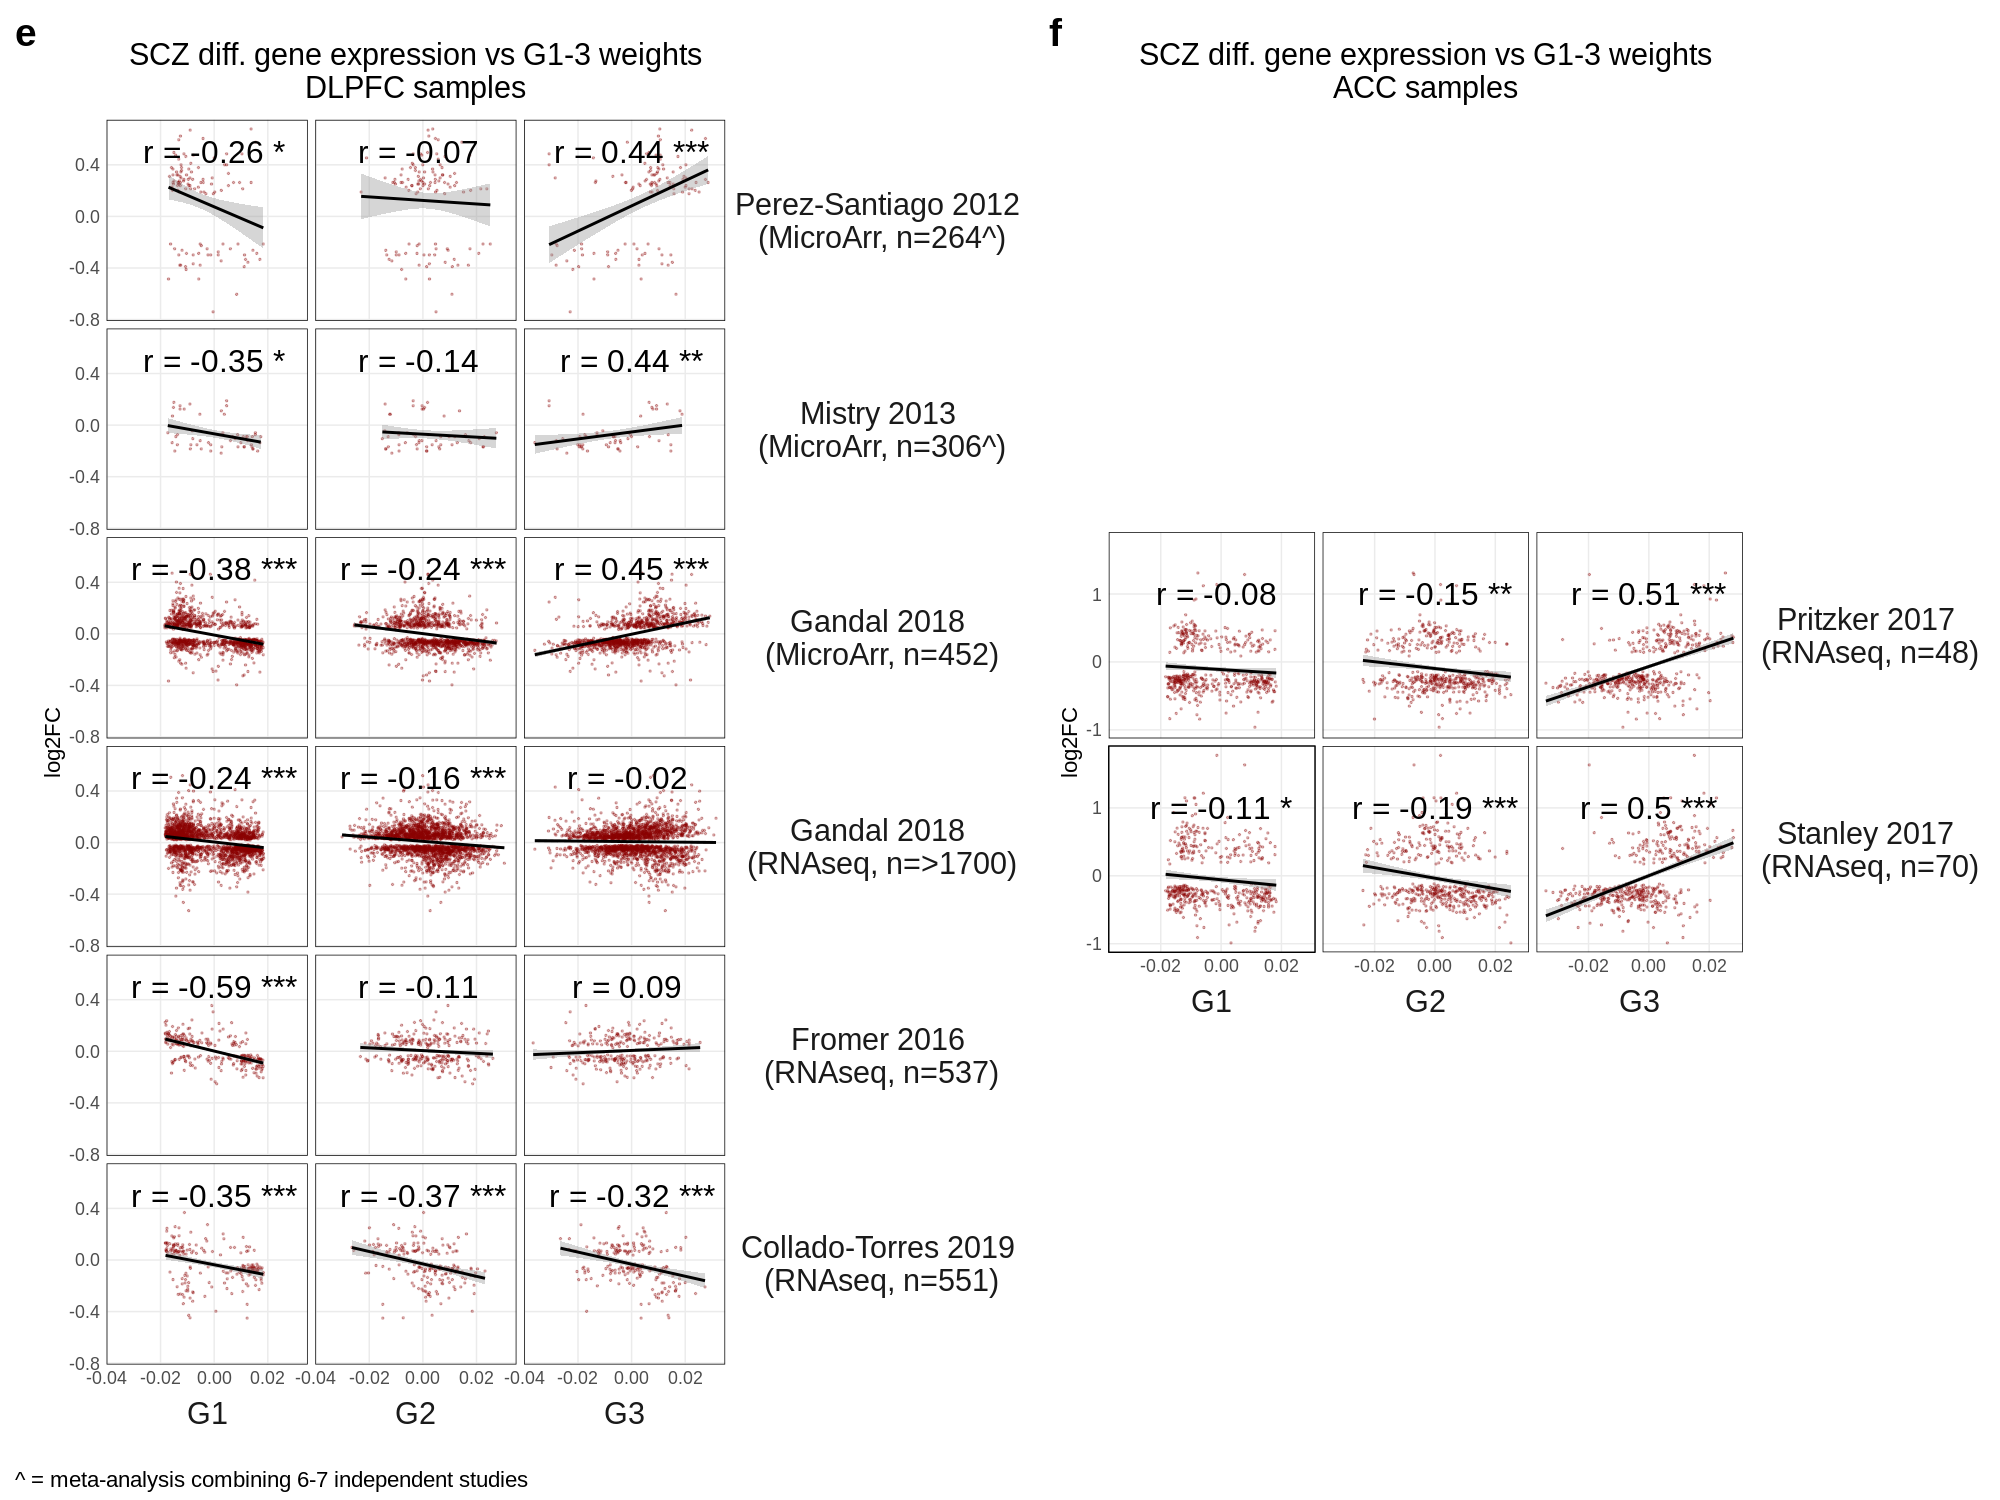

In [61]:
%%R -w 20 -h 15 --units in -r 100 -i dlpfc_studies_plot -i dlpfc_studies_corr -i acc_studies_plot -i acc_studies_corr
g1 = plot_log2FC(dlpfc_studies_plot, dlpfc_studies_corr, x=0, y=0.5) + ggtitle('SCZ diff. gene expression vs G1-3 weights\nDLPFC samples')
g2 = plot_log2FC(acc_studies_plot, acc_studies_corr, x=0) + ggtitle('SCZ diff. gene expression vs G1-3 weights\nACC samples')

themed = (g1 | g2) & 
theme(
    plot.title = element_text(size=22, hjust=.5, vjust=2), 
    # plot.tag.position = c(0, 1), 
    plot.tag = element_text(size=28, face='bold', hjust=0), 
    plot.caption = element_text(size = 16, hjust=0)) 

themed + plot_annotation(
    tag_levels=list(c('e','f')),
    caption='^ = meta-analysis combining 6-7 independent studies'
    )

## SCZD DEG with filtering

### Gandal genes intersection

In [704]:
gandal_both = (gandal_rnaseq
    .loc[lambda x: np.isin(x['gene'], gandal['gene'])]
)

gandal_combine = pd.concat({
    'Gandal\nmicroarray': gandal, 
    'Gandal\nRNAseq': gandal_rnaseq,
    'Gandal\nintersection': gandal_both
}).reset_index(0).rename({'level_0':'study'},axis=1).set_index('gene')

In [705]:
gene_corr = get_gene_corr2(weights, null_weights, gandal_combine, group='study')

gene_scatter = gandal_combine \
    .join(weights).dropna() \
    .rename({0:'G1',1:'G2',2:'G3'},axis=1) \
    .melt(id_vars=['study', 'log2FC', 'FDR'], var_name='G', value_name='weight') \
    .rename({'study':'label'},axis=1)
# gene_scatter

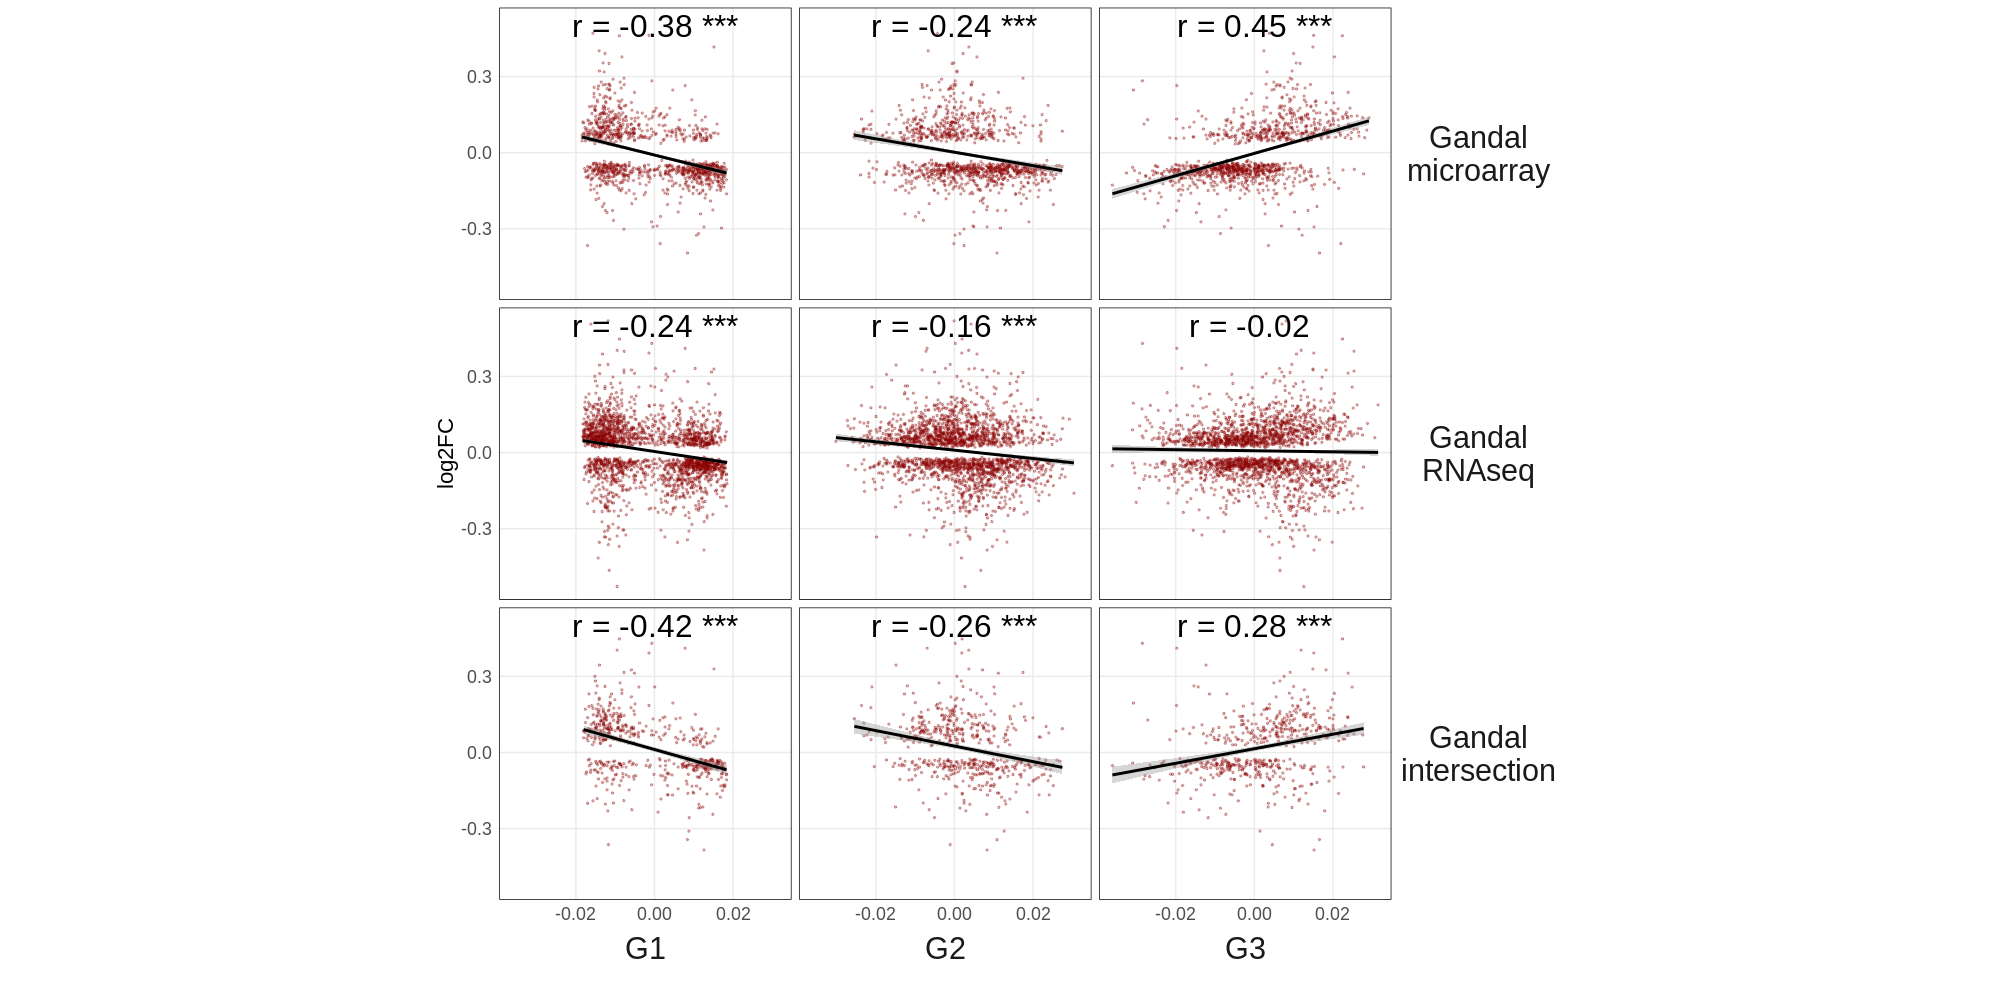

In [706]:
%%R -w 20 -h 10 --units in -r 100 -i gene_corr -i gene_scatter
plot_log2FC(gene_scatter, gene_corr, x=0, y=0.5)

### Filter for layers or cell types or overall expression...

In [769]:
dlpfc_studies_dict = {
    # 'Perez-Santiago 2012\n (MicroArr, n=264^)': perezsantiago,
    # 'Mistry 2013\n (MicroArr, n=306^)': mistry,
    'Gandal 2018\n (MicroArr, n=452)': gandal,
    'Gandal 2018\n (RNAseq, n=>1700)': gandal_rnaseq,
    # 'Gandal Intersection': gandal_both,
    'Fromer 2016\n (RNAseq, n=537)': fromer,
    'Collado-Torres 2019\n (RNAseq, n=551)': collado,
    }

In [770]:
# layers = he_layers.loc[lambda x: np.isin(x['label'], ['L1', 'L6'])].gene
layers = maynard_layers
# layers = pd.concat([he_layers, maynard_layers]).drop_duplicates()

dlpfc_layers = (pd.concat(dlpfc_studies_dict)
    # .assign(layer = lambda x: np.where(np.isin(x['gene'], layers), 'L1/L6', 'L2-5'))
    .join(layers.set_index('gene'), on='gene').rename({'label':'layer'},axis=1)
    .assign(layer = lambda x: x['layer'].astype('string'))
    .reset_index(0).rename({'level_0':'study'},axis=1)
    .join(weights.set_axis(['G1','G2','G3'],axis=1), on='gene')
    # .loc[lambda x: x['layer'].notnull()]
)
# dlpfc_layers

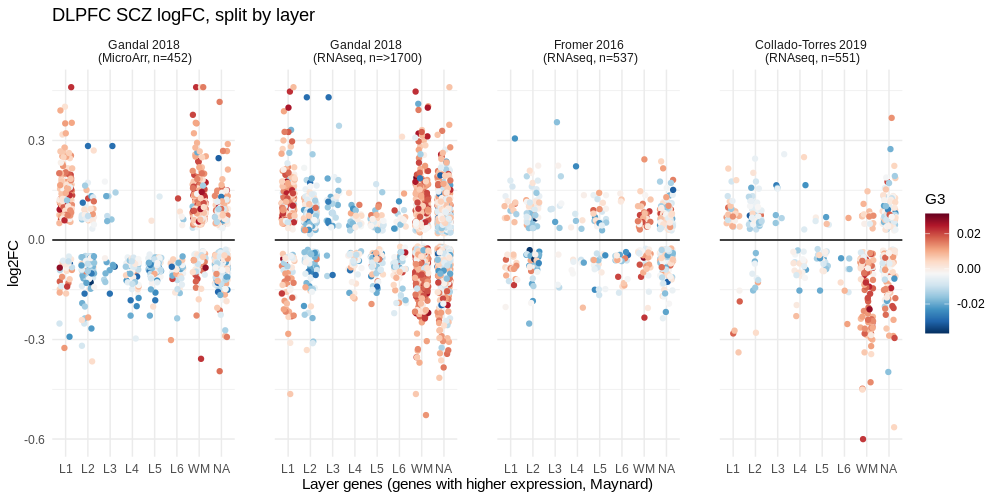

In [771]:
%%R -w 10 -h 5 --units in -r 100 -i dlpfc_layers
dlpfc_layers %>%
filter(!is.na(G3)) %>%
mutate(study = factor(study, levels=unique(.$study))) %>%
mutate(log2FC = pmin(log2FC, quantile(.$log2FC, .999))) %>%
ggplot(aes(x=layer, y=log2FC, color=G3, fill=G3)) +
facet_wrap(~study, ncol=6) +
geom_hline(yintercept=0) +
geom_jitter(alpha=1, shape=21, width=.3) +
scale_fill_gradientn(colors=rev(brewer.rdbu(100))) +
scale_color_gradientn(colors=rev(brewer.rdbu(100))) +
# geom_boxplot() +
# geom_violin() +
xlab('Layer genes (genes with higher expression, Maynard)') +
theme_minimal() + 
theme(panel.spacing = unit(2,'lines')) + 
ggtitle('DLPFC SCZ logFC, split by layer')

In [772]:
cells = get_cell_genes(which='jakob')
cells_order = ['Neuro-Ex', 'Neuro-In', 'Astro', 'Endo', 'Micro', 'Oligo', 'OPC']
layers = ['L1','L2','L3','L4','L5','L6']

dlpfc_cells = (pd.concat(dlpfc_studies_dict)
    # .loc[lambda x: np.isin(x['gene'], maynard_layers.query("label in @layers").gene)]
    # .assign(layer = lambda x: np.where(np.isin(x['gene'], cells), 'L1/L6', 'L2-5'))
    .join(cells.set_index('gene'), on='gene').rename({'label':'celltype'},axis=1)
    .assign(celltype = lambda x: pd.Categorical(x['celltype'], ordered=True, categories=cells_order))
    .reset_index(0).rename({'level_0':'study'},axis=1)
    .join(weights.set_axis(['G1','G2','G3'],axis=1), on='gene')
    # .sort_values('celltype')
    # .loc[lambda x: x['celltype'].notnull()]
)
dlpfc_cells

study      gene    log2FC       FDR  \
0          Gandal 2018\n (MicroArr, n=452)    TSPAN6  0.102144  0.006257   
16         Gandal 2018\n (MicroArr, n=452)       BAD -0.081440  0.000083   
18         Gandal 2018\n (MicroArr, n=452)      CD99  0.196313  0.000055   
19         Gandal 2018\n (MicroArr, n=452)    HS3ST1 -0.112538  0.000064   
26         Gandal 2018\n (MicroArr, n=452)  TMEM176A  0.167314  0.000173   
..                                     ...       ...       ...       ...   
728  Collado-Torres 2019\n (RNAseq, n=551)   ARFGEF2  0.066582  0.039606   
729  Collado-Torres 2019\n (RNAseq, n=551)    SAMSN1 -0.333125  0.028934   
730  Collado-Torres 2019\n (RNAseq, n=551)    CRYZL1  0.069562  0.021323   
731  Collado-Torres 2019\n (RNAseq, n=551)    ASPHD2 -0.143878  0.033164   
732  Collado-Torres 2019\n (RNAseq, n=551)       HDX -0.071489  0.064414   

    celltype        G1        G2        G3  
0        NaN -0.013669  0.004518  0.010899  
16       NaN -0.009029  0.015888 -0.012293  
18       NaN -0.012356  0.006441  0.020245  
19     Micro  0.016255 -0.010740 -0.005069  
26       NaN -0.015192  0.000633  0.007554  
..       ...       ...       ...       ...  
728     Endo  0.012136  0.005272  0.002820  
729    Micro       NaN       NaN       NaN  
730      NaN -0.014186  0.002092 -0.002256  
731      NaN -0.011919 -0.010875 -0.015070  
732      NaN       NaN       NaN       NaN  

[8996 rows x 8 columns]

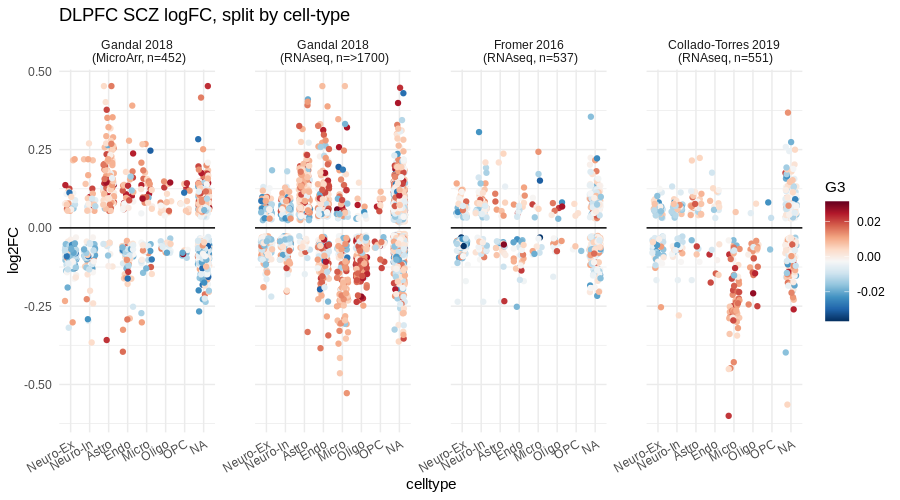

In [773]:
%%R -w 9 -h 5 --units in -r 100 -i dlpfc_cells
dlpfc_cells %>%
filter(!is.na(G3)) %>%
mutate(study = factor(study, levels=unique(.$study))) %>%
mutate(log2FC = pmin(log2FC, quantile(.$log2FC, .999))) %>%
ggplot(aes(x=celltype, y=log2FC, color=G3, fill=G3)) +
facet_wrap(~study, ncol=6) +
geom_hline(yintercept=0) +
geom_jitter(alpha=1, shape=21, width=.3) +
scale_fill_gradientn(colors=rev(brewer.rdbu(100))) +
scale_color_gradientn(colors=rev(brewer.rdbu(100))) +
# geom_boxplot() +
# geom_violin() +
theme_minimal() + 
theme(panel.spacing = unit(2,'lines'),
    axis.text.x=element_text(angle=30, hjust=1)
) +
ggtitle('DLPFC SCZ logFC, split by cell-type')

In [795]:
cells = get_cell_genes(which='jakob')
cells_order = ['Neuro-Ex', 'Neuro-In', 'Astro', 'Endo', 'Micro', 'Oligo', 'OPC']
# layers = ['L1','L2','L3','L4','L5','L6']
layers = ['L1','L2','L3']

dlpfc_cells = (pd.concat(dlpfc_studies_dict)
    .loc[lambda x: np.isin(x['gene'], maynard_layers.query("label in @layers").gene)]
    # .assign(layer = lambda x: np.where(np.isin(x['gene'], cells), 'L1/L6', 'L2-5'))
    .join(cells.set_index('gene'), on='gene').rename({'label':'celltype'},axis=1)
    .assign(celltype = lambda x: pd.Categorical(x['celltype'], ordered=True, categories=cells_order))
    .reset_index(0).rename({'level_0':'study'},axis=1)
    .join(weights.set_axis(['G1','G2','G3'],axis=1), on='gene')
    # .sort_values('celltype')
    # .loc[lambda x: x['celltype'].notnull()]
)
dlpfc_cells

study      gene    log2FC       FDR  \
0          Gandal 2018\n (MicroArr, n=452)    TSPAN6  0.102144  0.006257   
18         Gandal 2018\n (MicroArr, n=452)      CD99  0.196313  0.000055   
26         Gandal 2018\n (MicroArr, n=452)  TMEM176A  0.167314  0.000173   
37         Gandal 2018\n (MicroArr, n=452)    SLC7A2  0.221261  0.000054   
105        Gandal 2018\n (MicroArr, n=452)    CACNG3 -0.103133  0.001272   
..                                     ...       ...       ...       ...   
681  Collado-Torres 2019\n (RNAseq, n=551)  EIF4EBP2  0.080907  0.083193   
693  Collado-Torres 2019\n (RNAseq, n=551)  B4GALNT1 -0.120769  0.006967   
701  Collado-Torres 2019\n (RNAseq, n=551)   ALDH6A1  0.070835  0.099466   
707  Collado-Torres 2019\n (RNAseq, n=551)    CORO1A -0.152107  0.017995   
731  Collado-Torres 2019\n (RNAseq, n=551)    ASPHD2 -0.143878  0.033164   

     celltype        G1        G2        G3  
0         NaN -0.013669  0.004518  0.010899  
18        NaN -0.012356  0.006441  0.020245  
26        NaN -0.015192  0.000633  0.007554  
37      Astro       NaN       NaN       NaN  
105  Neuro-Ex -0.013893  0.009261 -0.015952  
..        ...       ...       ...       ...  
681       NaN       NaN       NaN       NaN  
693       NaN       NaN       NaN       NaN  
701       NaN -0.008698  0.001795  0.013118  
707     Micro -0.015347 -0.000364 -0.016905  
731       NaN -0.011919 -0.010875 -0.015070  

[1564 rows x 8 columns]

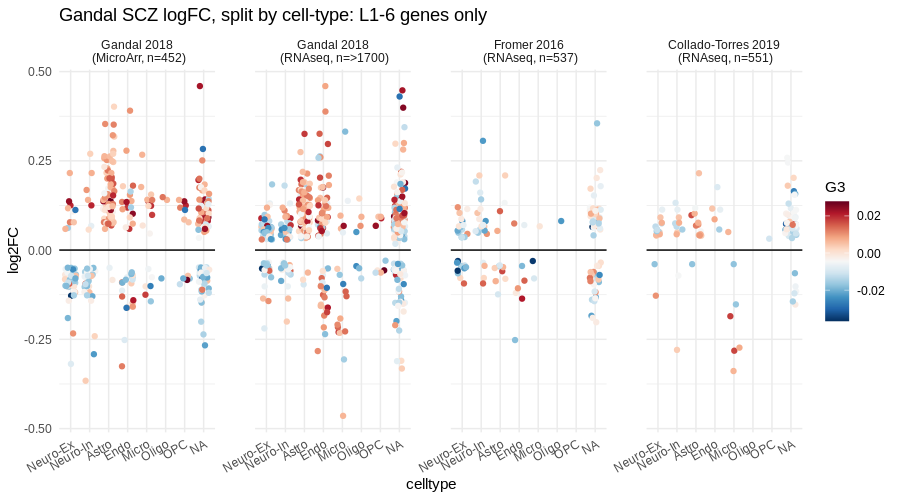

In [796]:
%%R -w 9 -h 5 --units in -r 100 -i dlpfc_cells
dlpfc_cells %>%
filter(!is.na(G3)) %>%
mutate(study = factor(study, levels=unique(.$study))) %>%
mutate(log2FC = pmin(log2FC, quantile(.$log2FC, .999))) %>%
ggplot(aes(x=celltype, y=log2FC, color=G3, fill=G3)) +
facet_wrap(~study, ncol=6) +
geom_hline(yintercept=0) +
geom_jitter(alpha=1, shape=21, width=.3) +
scale_fill_gradientn(colors=rev(brewer.rdbu(100))) +
scale_color_gradientn(colors=rev(brewer.rdbu(100))) +
# geom_boxplot() +
# geom_violin() +
theme_minimal() + 
theme(panel.spacing = unit(2,'lines'),
    axis.text.x=element_text(angle=30, hjust=1)
) +
ggtitle('Gandal SCZ logFC, split by cell-type: L1-6 genes only')

In [791]:
gandal_acc = (gandal_rnaseq
    .loc[lambda x: np.isin(x['gene'], list(pritzker.index) + list(stanley.index))]
    .set_index('gene')
)

In [792]:
# dlpfc_studies_dict = {
#     # 'Perez-Santiago 2012\n (MicroArr, n=264^)': perezsantiago,
#     # 'Mistry 2013\n (MicroArr, n=306^)': mistry,
#     # 'Gandal 2018\n (MicroArr, n=452)': gandal,
#     # 'Gandal 2018\n (RNAseq, n=>1700)': gandal_rnaseq,
#     # 'Gandal Intersection': gandal_both,
#     # 'Fromer 2016\n (RNAseq, n=537)': fromer,
#     # 'Collado-Torres 2019\n (RNAseq, n=551)': collado,
#     }

acc_studies_dict = {
    'Pritzker 2017\n (RNAseq, n=48)': pritzker,
    'Stanley 2017\n (RNAseq, n=70)': stanley,
    'Gandal ACC only': gandal_acc
    }

In [793]:
# layers = he_layers.loc[lambda x: np.isin(x['label'], ['L1', 'L6'])].gene
layers = maynard_layers
# layers = pd.concat([he_layers, maynard_layers]).drop_duplicates()

acc_layers = (pd.concat(acc_studies_dict)
    # .assign(layer = lambda x: np.where(np.isin(x['gene'], layers), 'L1/L6', 'L2-5'))
    .join(layers.set_index('gene'), on='gene').rename({'label':'layer'},axis=1)
    .assign(layer = lambda x: x['layer'].astype('string'))
    .reset_index(0).rename({'level_0':'study'},axis=1)
    .join(weights.set_axis(['G1','G2','G3'],axis=1), on='gene')
    # .loc[lambda x: x['layer'].notnull()]
)
acc_layers

study    log2FC       FDR layer  \
gene                                                                      
GNB1           Pritzker 2017\n (RNAseq, n=48) -0.199586  0.220381    L5   
GABRD          Pritzker 2017\n (RNAseq, n=48) -0.301036  0.249463    L3   
GABRD          Pritzker 2017\n (RNAseq, n=48) -0.301036  0.249463    L4   
PRKCZ          Pritzker 2017\n (RNAseq, n=48) -0.206598  0.270632  <NA>   
RP11-181G12.2  Pritzker 2017\n (RNAseq, n=48)  0.302664  0.213900  <NA>   
...                                       ...       ...       ...   ...   
LINC00672                     Gandal ACC only -0.039098  0.020424  <NA>   
DLGAP1-AS4                    Gandal ACC only -0.116497  0.001594  <NA>   
AC005197.2                    Gandal ACC only  0.117647  0.045141  <NA>   
CTD-3064M3.7                  Gandal ACC only  0.289149  0.000428  <NA>   
ADIRF-AS1                     Gandal ACC only  0.167066  0.000068  <NA>   

                     G1        G2        G3  
gene                                         
GNB1                NaN       NaN       NaN  
GABRD          0.012179  0.012335 -0.014876  
GABRD          0.012179  0.012335 -0.014876  
PRKCZ               NaN       NaN       NaN  
RP11-181G12.2       NaN       NaN       NaN  
...                 ...       ...       ...  
LINC00672           NaN       NaN       NaN  
DLGAP1-AS4     0.009644 -0.020318 -0.016840  
AC005197.2          NaN       NaN       NaN  
CTD-3064M3.7        NaN       NaN       NaN  
ADIRF-AS1           NaN       NaN       NaN  

[2553 rows x 7 columns]

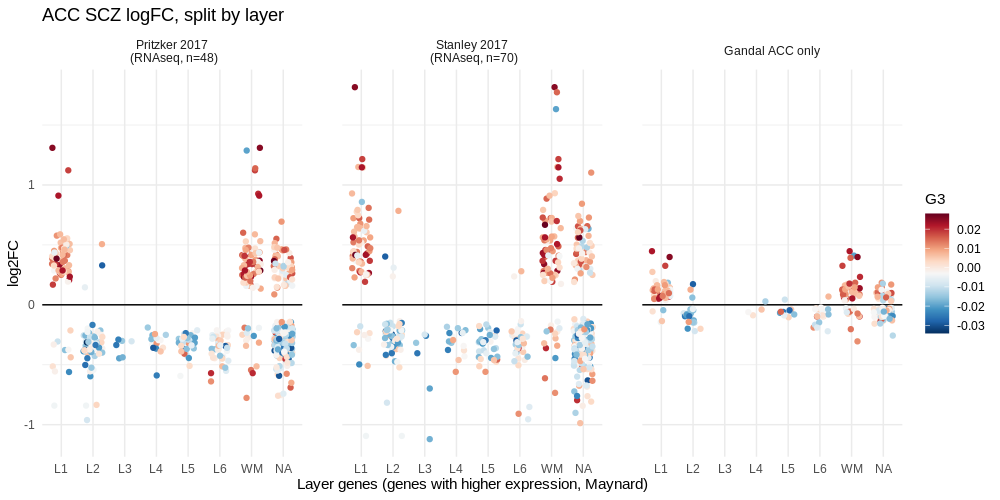

In [794]:
%%R -w 10 -h 5 --units in -r 100 -i acc_layers
acc_layers %>%
filter(!is.na(G3)) %>%
mutate(study = factor(study, levels=unique(.$study))) %>%
mutate(log2FC = pmin(log2FC, quantile(.$log2FC, .999))) %>%
ggplot(aes(x=layer, y=log2FC, color=G3, fill=G3)) +
facet_wrap(~study, ncol=6) +
geom_hline(yintercept=0) +
geom_jitter(alpha=1, shape=21, width=.3) +
scale_fill_gradientn(colors=rev(brewer.rdbu(100))) +
scale_color_gradientn(colors=rev(brewer.rdbu(100))) +
# geom_boxplot() +
# geom_violin() +
xlab('Layer genes (genes with higher expression, Maynard)') +
theme_minimal() + 
theme(panel.spacing = unit(2,'lines')) + 
ggtitle('ACC SCZ logFC, split by layer')

In [411]:
dlpfc_regions = fetch_hcp()['info'].query("cortex=='Dorsolateral_Prefrontal' & hemisphere=='L'")['id']
dlpfc_means = dm_hcp_3d_ds5.expression.loc[lambda x: np.isin(x.index, dlpfc_regions)].mean().sort_values()
gene_filter = dlpfc_means.tail(4000).index

In [598]:
layers = ['L1','L2','L3','L4','L5','L6'] #['L6']
gene_filter = maynard_layers.loc[lambda x: np.isin(x['label'], layers)].gene
# gene_filter = get_cell_genes(which='jakob').loc[lambda x: x['label'].str.contains('Astro')].gene
len(gene_filter)

3786

In [599]:
# gene_filter = gandal.gene
# gene_filter = list(stanley.loc[lambda x: x['FDR']<0.05].index) + list(pritzker.loc[lambda x: x['FDR']<0.05].index)

In [600]:
gandal.assign(updn=lambda x: np.where(x['log2FC']>0,'up','dn'), 
              filter_pct=lambda x: np.isin(x['gene'], gene_filter),
              filter_FC = lambda x: np.where(x['filter_pct'], x['log2FC'],np.NaN)) \
      .groupby('updn').mean()

log2FC       FDR  filter_pct  filter_FC
updn                                           
dn   -0.079046  0.014901    0.287154  -0.093780
up    0.110520  0.015127    0.319149   0.142707

In [601]:
(gandal_rnaseq 
# .loc[lambda x: np.isin(x.gene, gandal.gene)] \
        .assign(updn=lambda x: np.where(x['log2FC']>0,'up','dn'), 
              filter_pct=lambda x: np.isin(x['gene'], gene_filter),
              filter_FC = lambda x: np.where(x['filter_pct'], x['log2FC'],np.NaN)) 
      .groupby('updn').mean()
)

log2FC       FDR  filter_pct  filter_FC
updn                                           
dn   -0.098664  0.013472    0.139112  -0.100077
up    0.101834  0.011928    0.251123   0.107001

In [608]:
dlpfc_filter_dict = {name:study.loc[lambda x: np.isin(x['gene'], gene_filter)] 
    for name, study in dlpfc_studies_dict.items()}

dlpfc_filter = pd.concat(dlpfc_filter_dict).reset_index(0).rename({'level_0':'study'},axis=1).set_index('gene') \
      .assign(study = lambda x: pd.Categorical(x['study'],ordered=True,categories=x['study'].unique()))

dlpfc_filter_corr = get_gene_corr2(weights, null_weights, dlpfc_filter, group='study')

dlpfc_filter_plot = dlpfc_filter \
    .join(weights).dropna() \
    .rename({0:'G1',1:'G2',2:'G3'},axis=1) \
    .melt(id_vars=['study', 'log2FC', 'FDR'], var_name='G', value_name='weight') \
    .rename({'study':'label'},axis=1).sort_values('label')

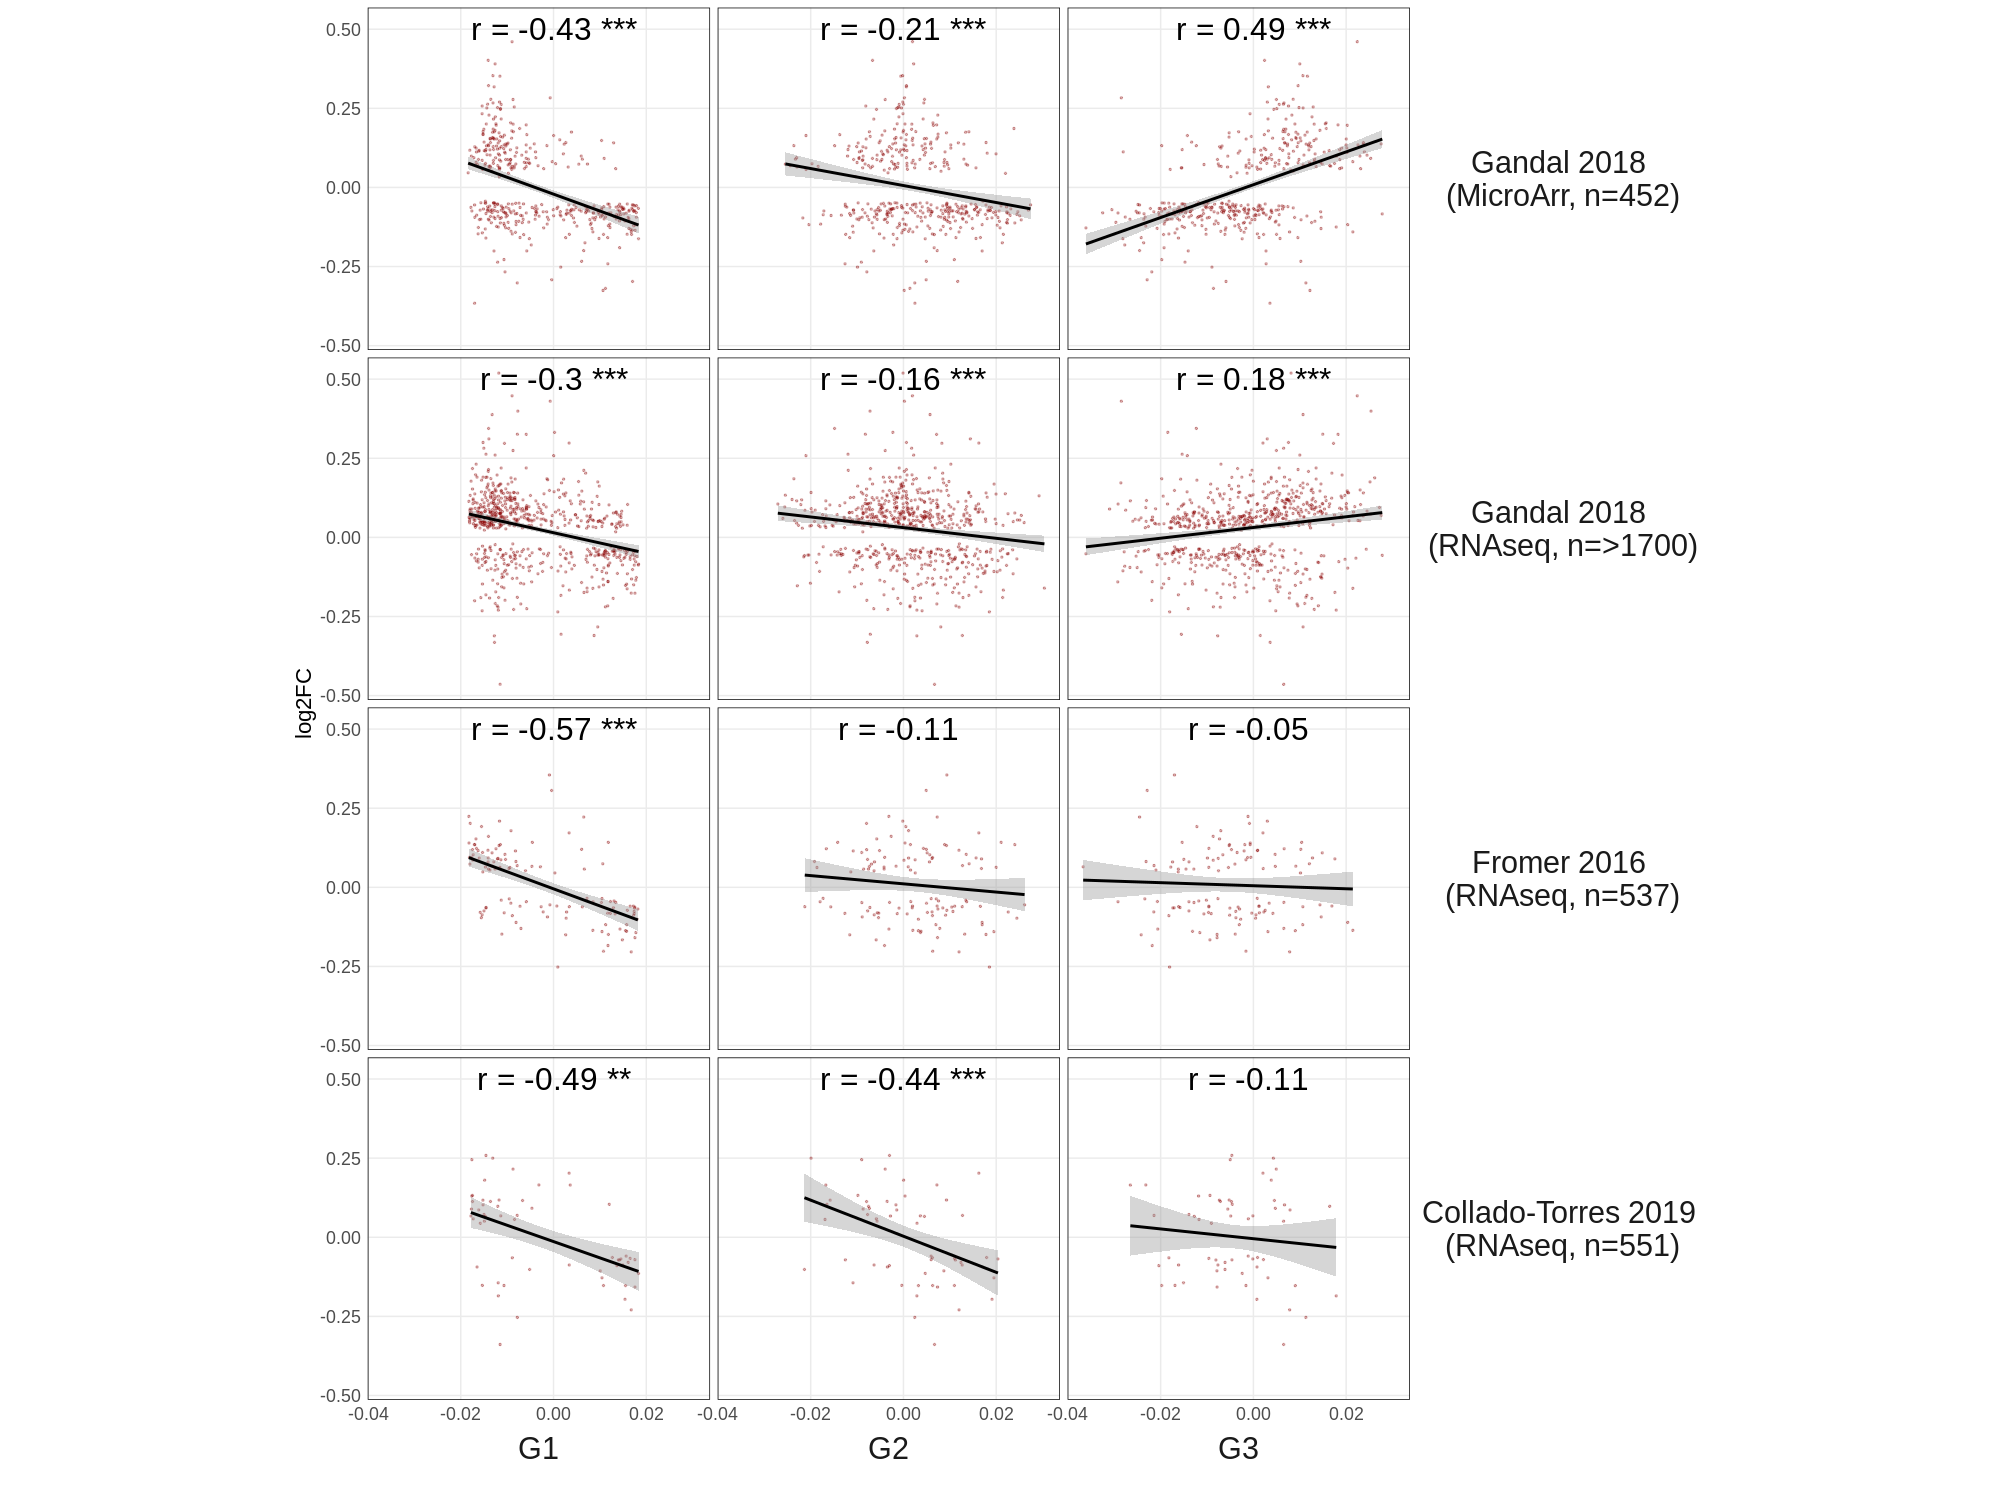

In [609]:
%%R -w 20 -h 15 --units in -r 100 -i dlpfc_filter_corr -i dlpfc_filter_plot
plot_log2FC(dlpfc_filter_plot, dlpfc_filter_corr, x=0, y=0.5)

## Rare genes

In [40]:
rare_genes = get_rare_genes()

In [704]:
true_, null_ = compute_enrichments(weights, null_weights, rare_genes)

In [705]:
null_p_rare = compute_null_p(true_, null_)

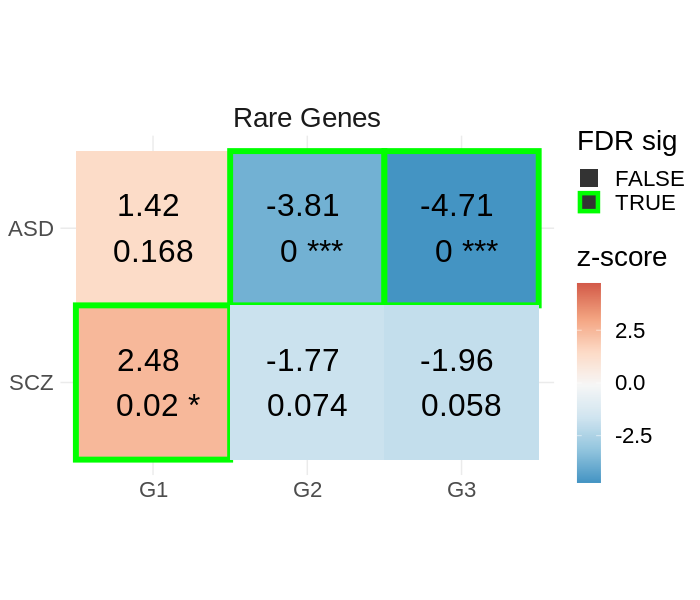

In [718]:
%%R -i null_p_rare -w 7 -h 6 --units in -r 100
source("../code/enrichmentsPlots.R")
null_p_rare %>% mutate(version='Rare Genes') %>%
plot_enrichment_heatmaps()

In [810]:
null_p_rare_versions_dict = {
    'Pos Weights': compute_null_p(*compute_enrichments(weights, null_weights, rare_genes, posneg='pos')),
    'Neg Weights': compute_null_p(*compute_enrichments(weights, null_weights, rare_genes, posneg='neg')),
}

null_p_versions = (pd.concat(null_p_rare_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

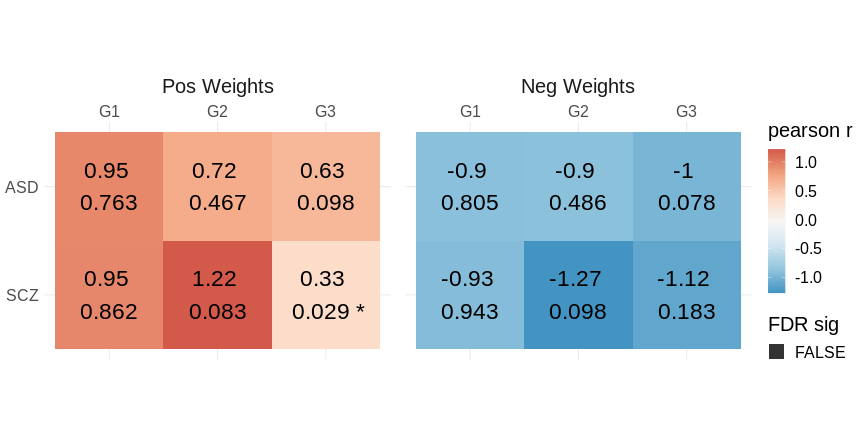

In [813]:
%%R -w 12 -h 6 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2)

## Gandal genes

In [735]:
gandal_genes_micro = get_gandal_genes(which='microarray')
gandal_genes_rna = get_gandal_genes(which='rnaseq', disorders=['ASD','SCZ'])

### Overlaps

In [736]:
disorders = ['ASD','MDD','SCZ']
for d in disorders:
    gandal_genes_micro[f'{d}.sig'] = gandal_genes_micro[f'{d}.FDR'] < .05

(gandal_genes_micro
 .groupby([f'{d}.sig' for d in disorders])
 .size()
 .rename('n').reset_index()
 .assign(pct = lambda x: [n if n<10000 else np.nan for n in x['n']])
 .assign(pct = lambda x: round(x['pct']/x['pct'].sum(),2))
 .sort_values('pct', ascending=False)
)

ASD.sig  MDD.sig  SCZ.sig      n   pct
4     True    False    False   1864  0.45
1    False    False     True   1433  0.34
5     True    False     True    557  0.13
2    False     True    False    252  0.06
3    False     True     True     36  0.01
6     True     True    False     29  0.01
7     True     True     True     11  0.00
0    False    False    False  22341   NaN

In [737]:
gandal_sig = (gandal_genes_micro
              .loc[:,[f'{d}.sig' for d in disorders]]
              .melt(ignore_index=False, var_name='d', value_name='sig')
              .assign(d = lambda x: x['d'].str.replace('.sig','', regex=False))
              .set_index('d', append=True)
             )
gandal_sig

gandal_log2FC = (gandal_genes_micro
              .loc[:,[f'{d}.log2FC' for d in disorders]]
              .melt(ignore_index=False, var_name='d', value_name='log2FC')
              .assign(d = lambda x: x['d'].str.replace('.log2FC','', regex=False))
              .set_index('d', append=True)
              .join(gandal_sig)
              .reset_index(1)
                 )

gandal_overlap = (gandal_log2FC
                  .join(gandal_log2FC, lsuffix='_x', rsuffix='_y')
                  .dropna()
                  .loc[lambda x:
                       (x['d_x'] == 'ASD') & (x['d_y'] == 'SCZ') |
                       (x['d_x'] == 'MDD') & (x['d_y'] == 'SCZ') |
                       (x['d_x'] == 'MDD') & (x['d_y'] == 'ASD'), :]
                 )
gandal_overlap

d_x  log2FC_x  sig_x  d_y  log2FC_y  sig_y
gene                                                    
1.Dec         ASD  0.129671  False  SCZ -0.000311  False
1.Dec         MDD  0.021590  False  ASD  0.129671  False
1.Dec         MDD  0.021590  False  SCZ -0.000311  False
1.Mar         ASD  0.003611  False  SCZ  0.039644  False
1.Mar         MDD  0.077234  False  ASD  0.003611  False
...           ...       ...    ...  ...       ...    ...
ZZEF1         MDD -0.030545  False  SCZ -0.029585  False
ZZZ3          ASD  0.089637  False  SCZ  0.056258   True
ZZZ3          MDD -0.019721  False  ASD  0.089637  False
ZZZ3          MDD -0.019721  False  SCZ  0.056258   True
hsa-mir-5195  MDD -0.015952  False  ASD  0.108816  False

[39657 rows x 6 columns]

In [ ]:
gandal_log2FC.loc[lambda x: (x['d']=='SCZ') & (x['sig'])].join(df_ramaker).corr()

log2FC  sig  Pritzker_FoldChange  Stanley_FoldChange  \
log2FC               1.000000  NaN             0.913839            0.819385   
sig                       NaN  NaN                  NaN                 NaN   
Pritzker_FoldChange  0.913839  NaN             1.000000            0.920841   
Stanley_FoldChange   0.819385  NaN             0.920841            1.000000   
Pritzker_FDR         0.100487  NaN             0.062992            0.046062   
Stanley_FDR         -0.203275  NaN            -0.165487           -0.169340   

                     Pritzker_FDR  Stanley_FDR  
log2FC                   0.100487    -0.203275  
sig                           NaN          NaN  
Pritzker_FoldChange      0.062992    -0.165487  
Stanley_FoldChange       0.046062    -0.169340  
Pritzker_FDR             1.000000    -0.017901  
Stanley_FDR             -0.017901     1.000000

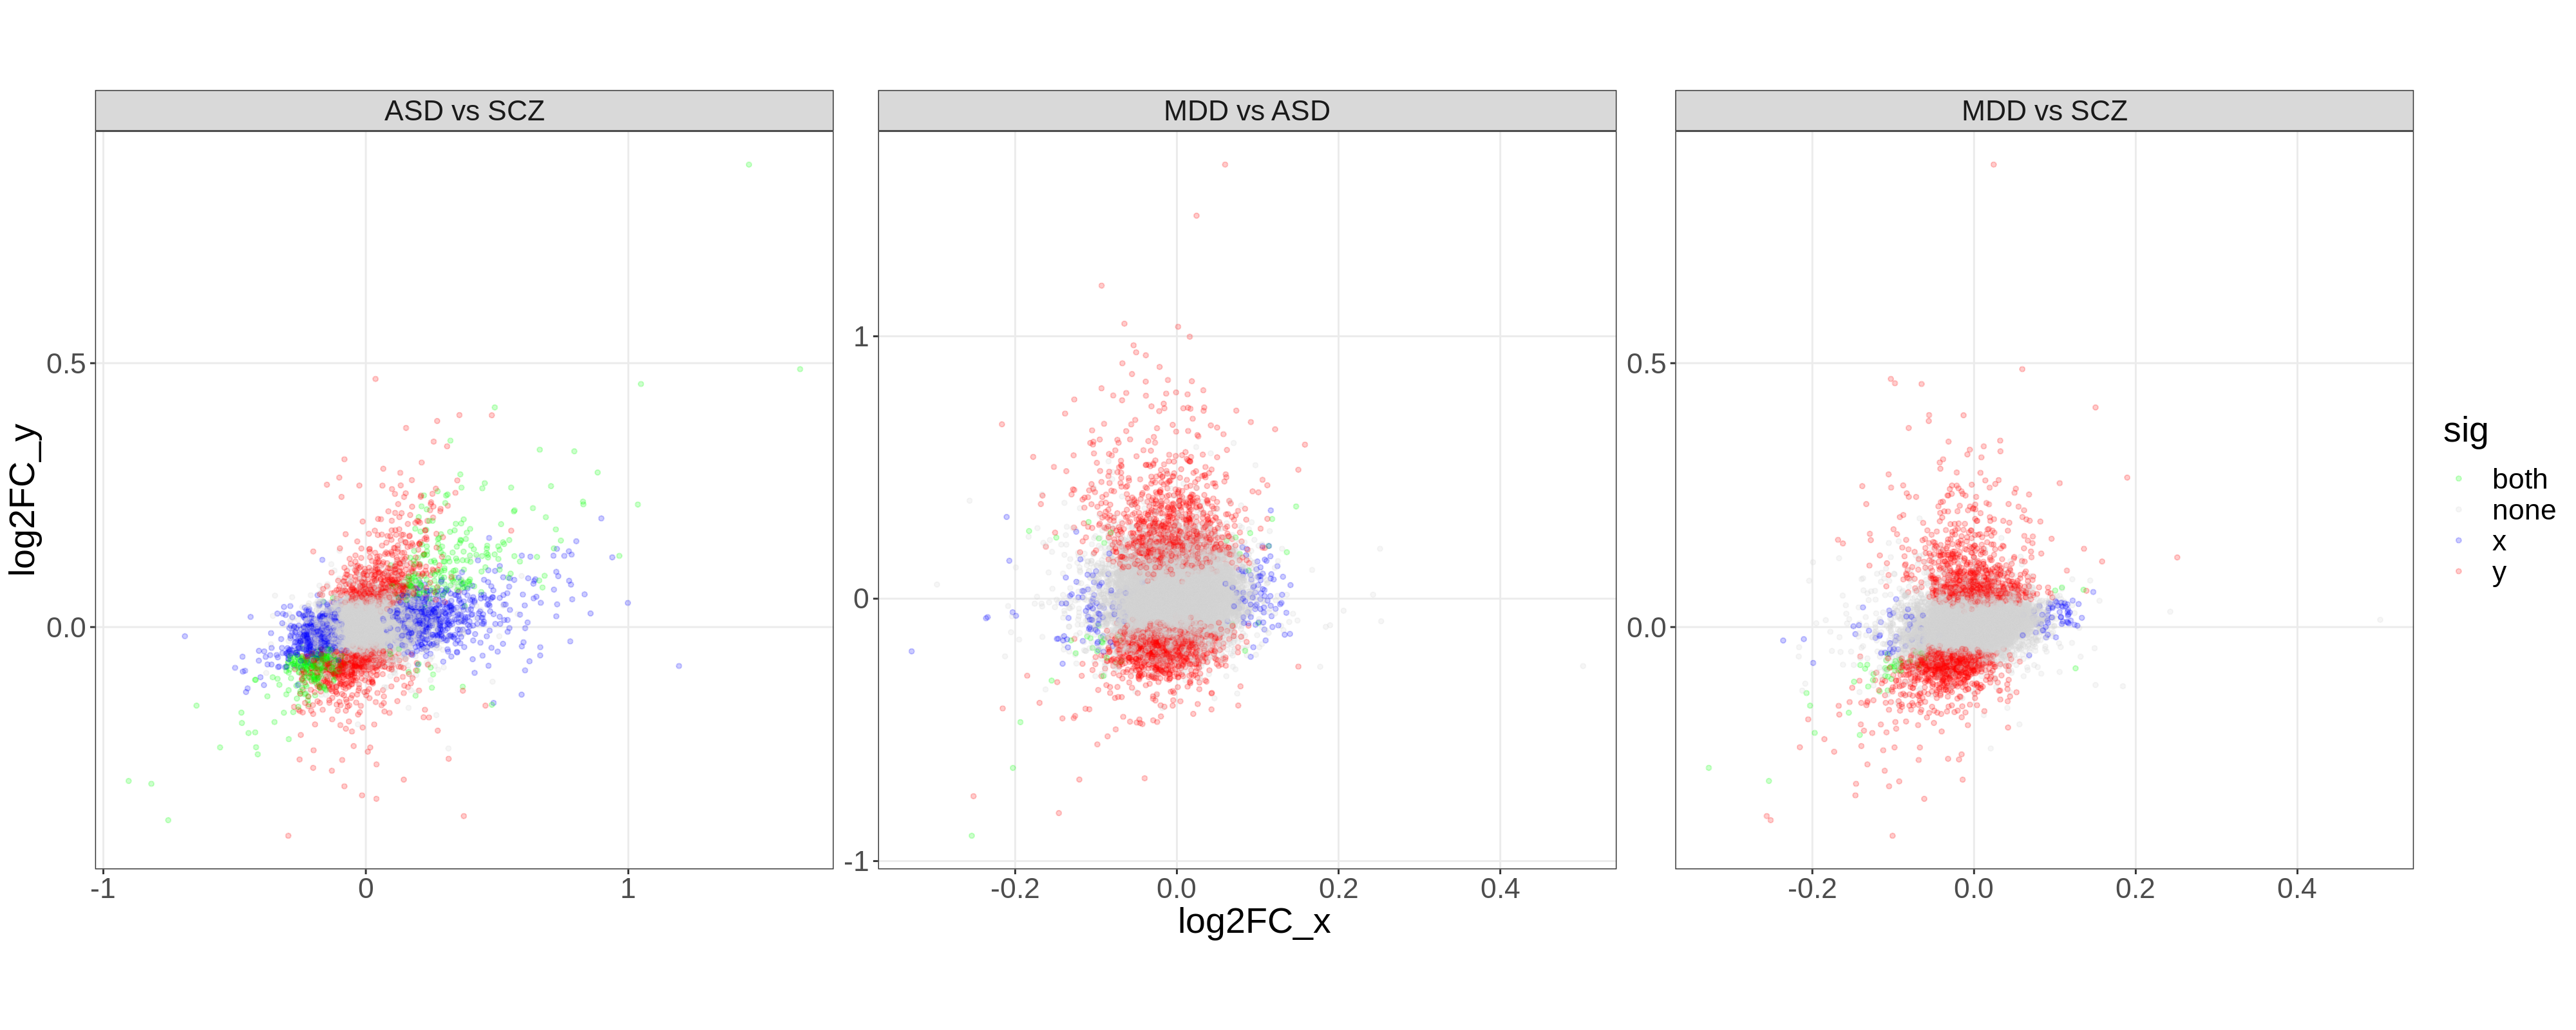

In [695]:
%%R -i gandal_overlap -w 20 -h 8 --units in -r 200
gandal_overlap %>%
mutate(name = paste(d_x,'vs',d_y)) %>%
mutate(sig = case_when(
        sig_x & sig_y ~ 'both', sig_x ~ 'x', sig_y ~ 'y', TRUE ~ 'none')
      ) %>% 
ggplot(aes(x=log2FC_x, y=log2FC_y)) + 
facet_wrap(~name, ncol=3, scales='free') +
geom_point(aes(color=sig), size=1, alpha=.2) + 
scale_color_manual(values=c('green','lightgrey','blue','red')) +
theme_bw() +
theme(
    aspect.ratio=1,
    panel.grid.minor=element_blank(),
    text=element_text(size=20)
)

In [738]:
disorders = ['ASD', 'SCZ']
for d in disorders:
    gandal_genes_rna[f'{d}.sig'] = gandal_genes_rna[f'{d}.FDR'] < .05

gandal_sig = (gandal_genes_micro
              .loc[:,[f'{d}.sig' for d in disorders]]
              .melt(ignore_index=False, var_name='d', value_name='sig')
              .assign(d = lambda x: x['d'].str.replace('.sig','', regex=False))
              .set_index('d', append=True)
             )

gandal_log2FC = (gandal_genes_micro
              .loc[:,[f'{d}.log2FC' for d in disorders]]
              .melt(ignore_index=False, var_name='d', value_name='log2FC')
              .assign(d = lambda x: x['d'].str.replace('.log2FC','', regex=False))
              .set_index('d', append=True)
              .join(gandal_sig)
              # .reset_index(1)
                 )

gandal_sig_rna = (gandal_genes_rna
              .loc[:,[f'{d}.sig' for d in disorders]]
              .melt(ignore_index=False, var_name='d', value_name='sig')
              .assign(d = lambda x: x['d'].str.replace('.sig','', regex=False))
              .set_index('d', append=True)
             )

gandal_log2FC_rna = (gandal_genes_rna
              .loc[:,[f'{d}.log2FC' for d in disorders]]
              .melt(ignore_index=False, var_name='d', value_name='log2FC')
              .assign(d = lambda x: x['d'].str.replace('.log2FC','', regex=False))
              .set_index('d', append=True)
              .join(gandal_sig_rna)
              # .reset_index(1)
                 )




gene    d  log2FC_micro  sig_micro  log2FC_rna sig_rna
0              TSPAN6  ASD      0.117073      False    0.164046   False
1                TNMD  ASD      0.082085      False    0.059227   False
2                DPM1  ASD      0.004612      False    0.003448   False
3               SCYL3  ASD     -0.030065      False   -0.094801   False
4            C1orf112  ASD     -0.102755      False   -0.071735   False
...               ...  ...           ...        ...         ...     ...
24950           MILR1  SCZ     -0.015322      False   -0.208963    True
24951  RP11-152N13.16  SCZ     -0.011695      False   -0.033003   False
24952   RP11-302B13.5  SCZ     -0.062727       True    0.124363   False
24953    CTC-487M23.8  SCZ      0.014645      False    0.048725   False
24954          GRIN2B  SCZ      0.019514      False    0.016681   False

[24955 rows x 6 columns]

In [754]:
gandal_compare = (gandal_log2FC
                  .join(gandal_log2FC_rna, lsuffix='_micro', rsuffix='_rna')
                  .dropna()
                  .reset_index()
                  .loc[lambda x: (x['sig_micro'] | x['sig_rna'])]
                  .loc[lambda x: x['d']=='SCZ']
                 )
gandal_compare

gene    d  log2FC_micro  sig_micro  log2FC_rna sig_rna
14076          TSPAN6  SCZ      0.102144       True    0.064075    True
14080        C1orf112  SCZ     -0.006440      False   -0.077192    True
14085          NIPAL3  SCZ     -0.020317      False   -0.045989    True
14088          SEMA3F  SCZ      0.021599      False    0.224156    True
14090         CYP51A1  SCZ     -0.045789      False   -0.036954    True
...               ...  ...           ...        ...         ...     ...
24934       CEBPA-AS1  SCZ      0.011401      False    0.108498    True
24936        NDUFV2P1  SCZ     -0.051738       True   -0.110203   False
24945  RP11-727F15.12  SCZ     -0.011325      False   -0.073825    True
24950           MILR1  SCZ     -0.015322      False   -0.208963    True
24952   RP11-302B13.5  SCZ     -0.062727       True    0.124363   False

[3990 rows x 6 columns]

In [747]:
gandal_compare.corr()

log2FC_micro  sig_micro  log2FC_rna
log2FC_micro      1.000000        NaN    0.749968
sig_micro              NaN        NaN         NaN
log2FC_rna        0.749968        NaN    1.000000

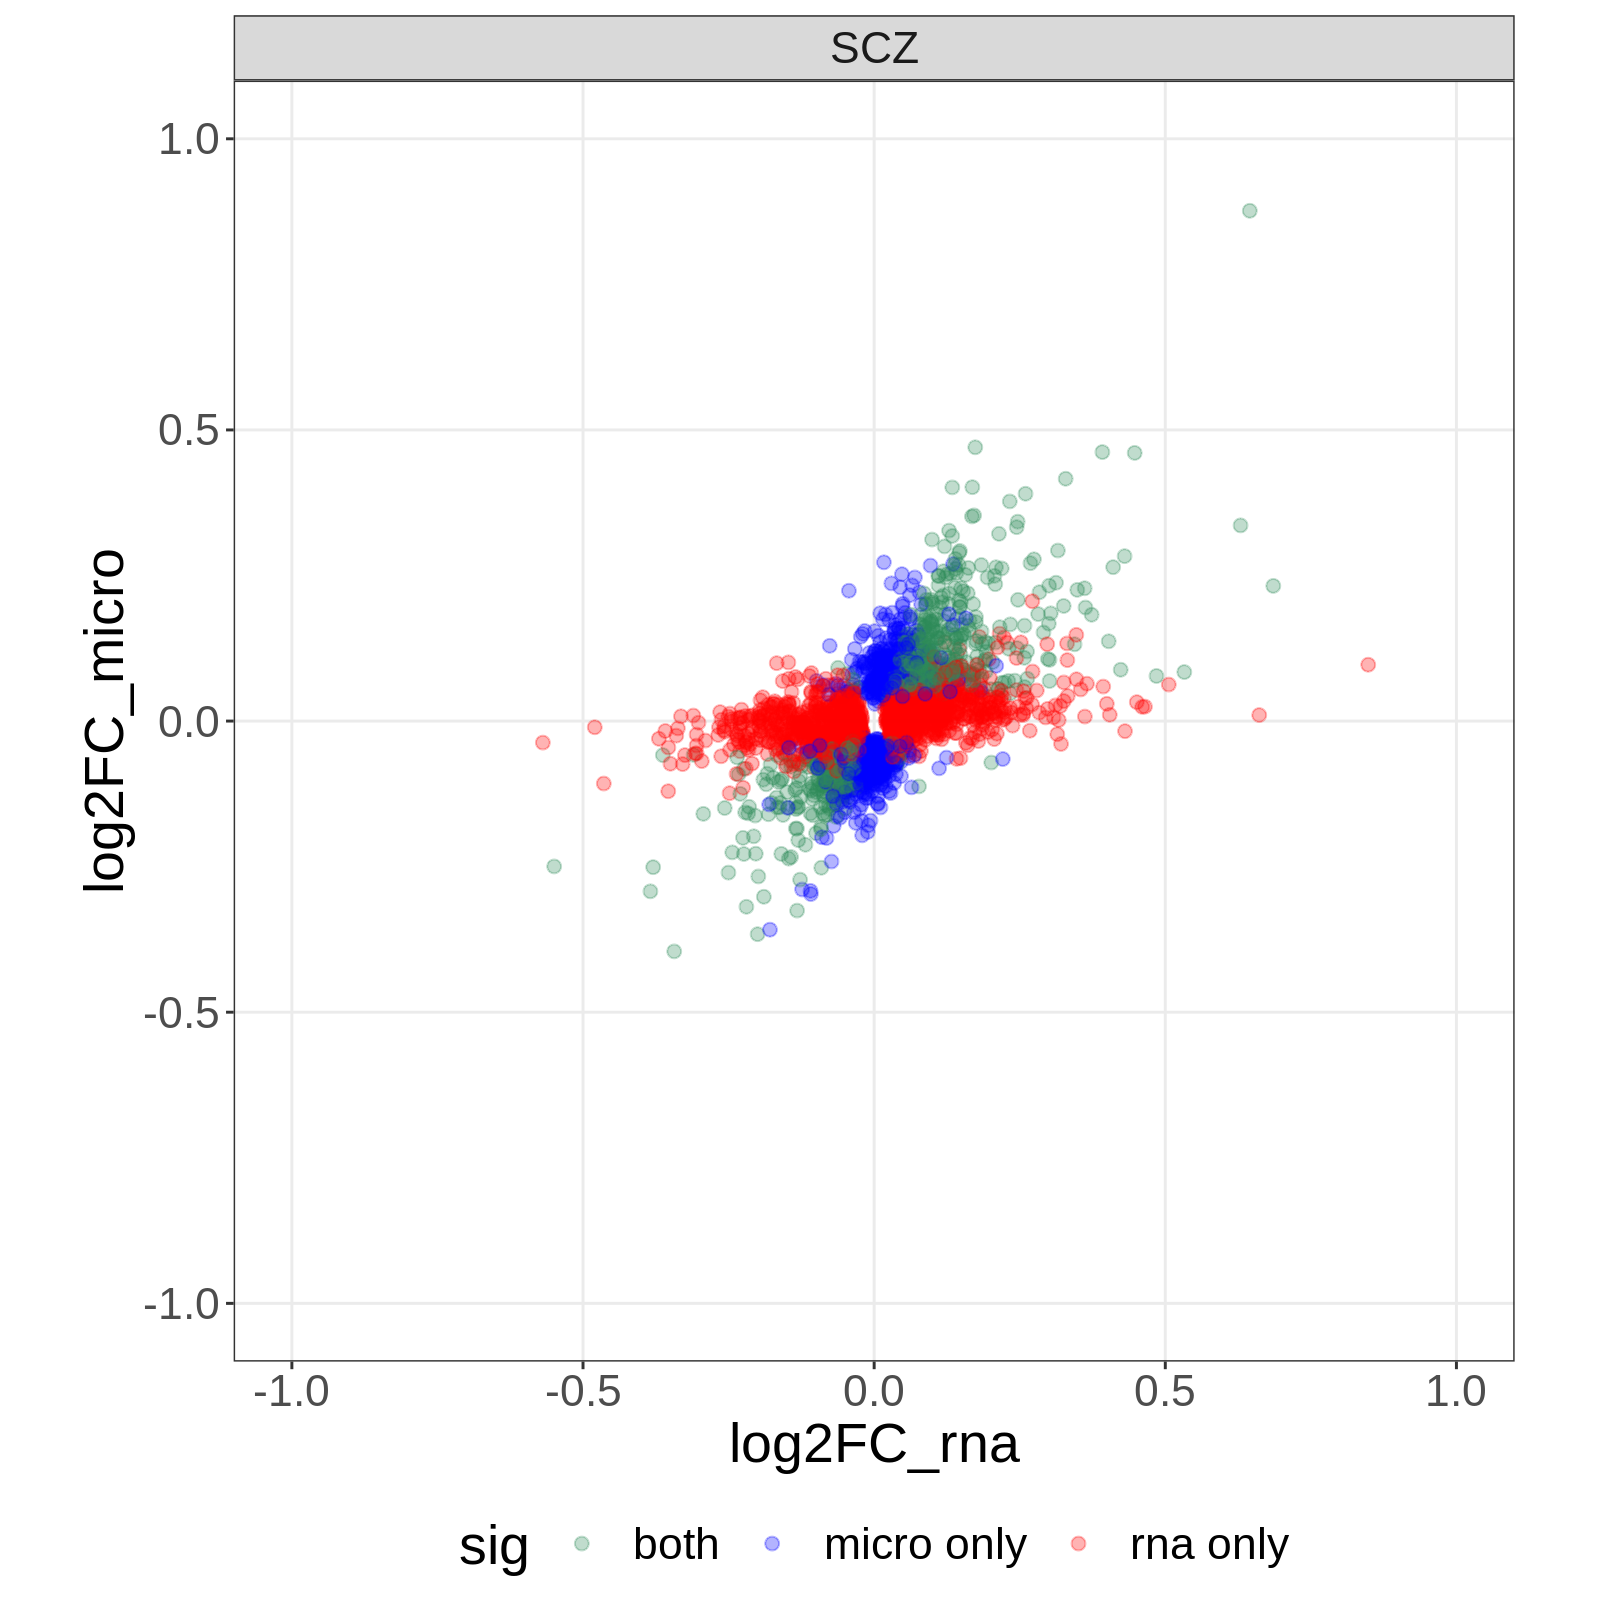

In [756]:
%%R -i gandal_compare -w 8 -h 8 --units in -r 200
gandal_compare %>%
# mutate(name = paste(d_x,'vs',d_y)) %>%
mutate(sig = case_when(
        sig_micro & sig_rna ~ 'both', sig_micro ~ 'micro only', sig_rna ~ 'rna only', TRUE ~ 'none')
      ) %>% 
ggplot(aes(x=log2FC_rna, y=log2FC_micro)) + 
facet_wrap(~d, ncol=2, scales='free') +
geom_point(aes(color=sig), size=2, alpha=.3) + 
# scale_color_manual(values=c('seagreen','blue','lightgrey','red')) +
scale_color_manual(values=c('seagreen','blue','red')) +
xlim(c(-1,1)) + ylim(c(-1,1)) +
theme_bw() +
theme(
    aspect.ratio=1,
    panel.grid.minor=element_blank(),
    text=element_text(size=20),
    legend.position='bottom'
)

In [758]:

weights_melt = weights.set_axis(['G1','G2','G3'],axis=1).stack().rename('weight').to_frame().rename_axis(['gene','G']).reset_index(1)

fdr_melt = (gandal_genes_micro
 .loc[:, [f'{d}.FDR' for d in ['ASD','MDD','SCZ']]]
 .rename({f'{d}.FDR':d for d in ['ASD','MDD','SCZ']},axis=1)
 .stack().rename('FDR').to_frame()
 .rename_axis(['gene','disorder'])
 .assign(sig = lambda x: x['FDR']<.05)
)

dge_melt = (gandal_genes_micro
 .loc[:, [f'{d}.log2FC' for d in ['ASD','MDD','SCZ']]]
 .rename({f'{d}.log2FC':d for d in ['ASD','MDD','SCZ']},axis=1)
 .stack().rename('log2FC').to_frame()
 .rename_axis(['gene','disorder'])
 .join(fdr_melt)
 .reset_index(1)
)


df_weights_dge = weights_melt.join(dge_melt).reset_index().dropna()

In [765]:
genes_sig = df_weights_dge.query("sig==True")
ASD_genes = genes_sig.loc[lambda x: x['disorder'] == 'ASD', 'gene']
SCZ_genes = genes_sig.loc[lambda x: x['disorder'] == 'SCZ', 'gene']
intersection = set(ASD_genes).intersection(SCZ_genes)

df_weights_dge = (df_weights_dge
                  .assign(both_sig = lambda x: np.isin(x['gene'], list(intersection)))
                 )

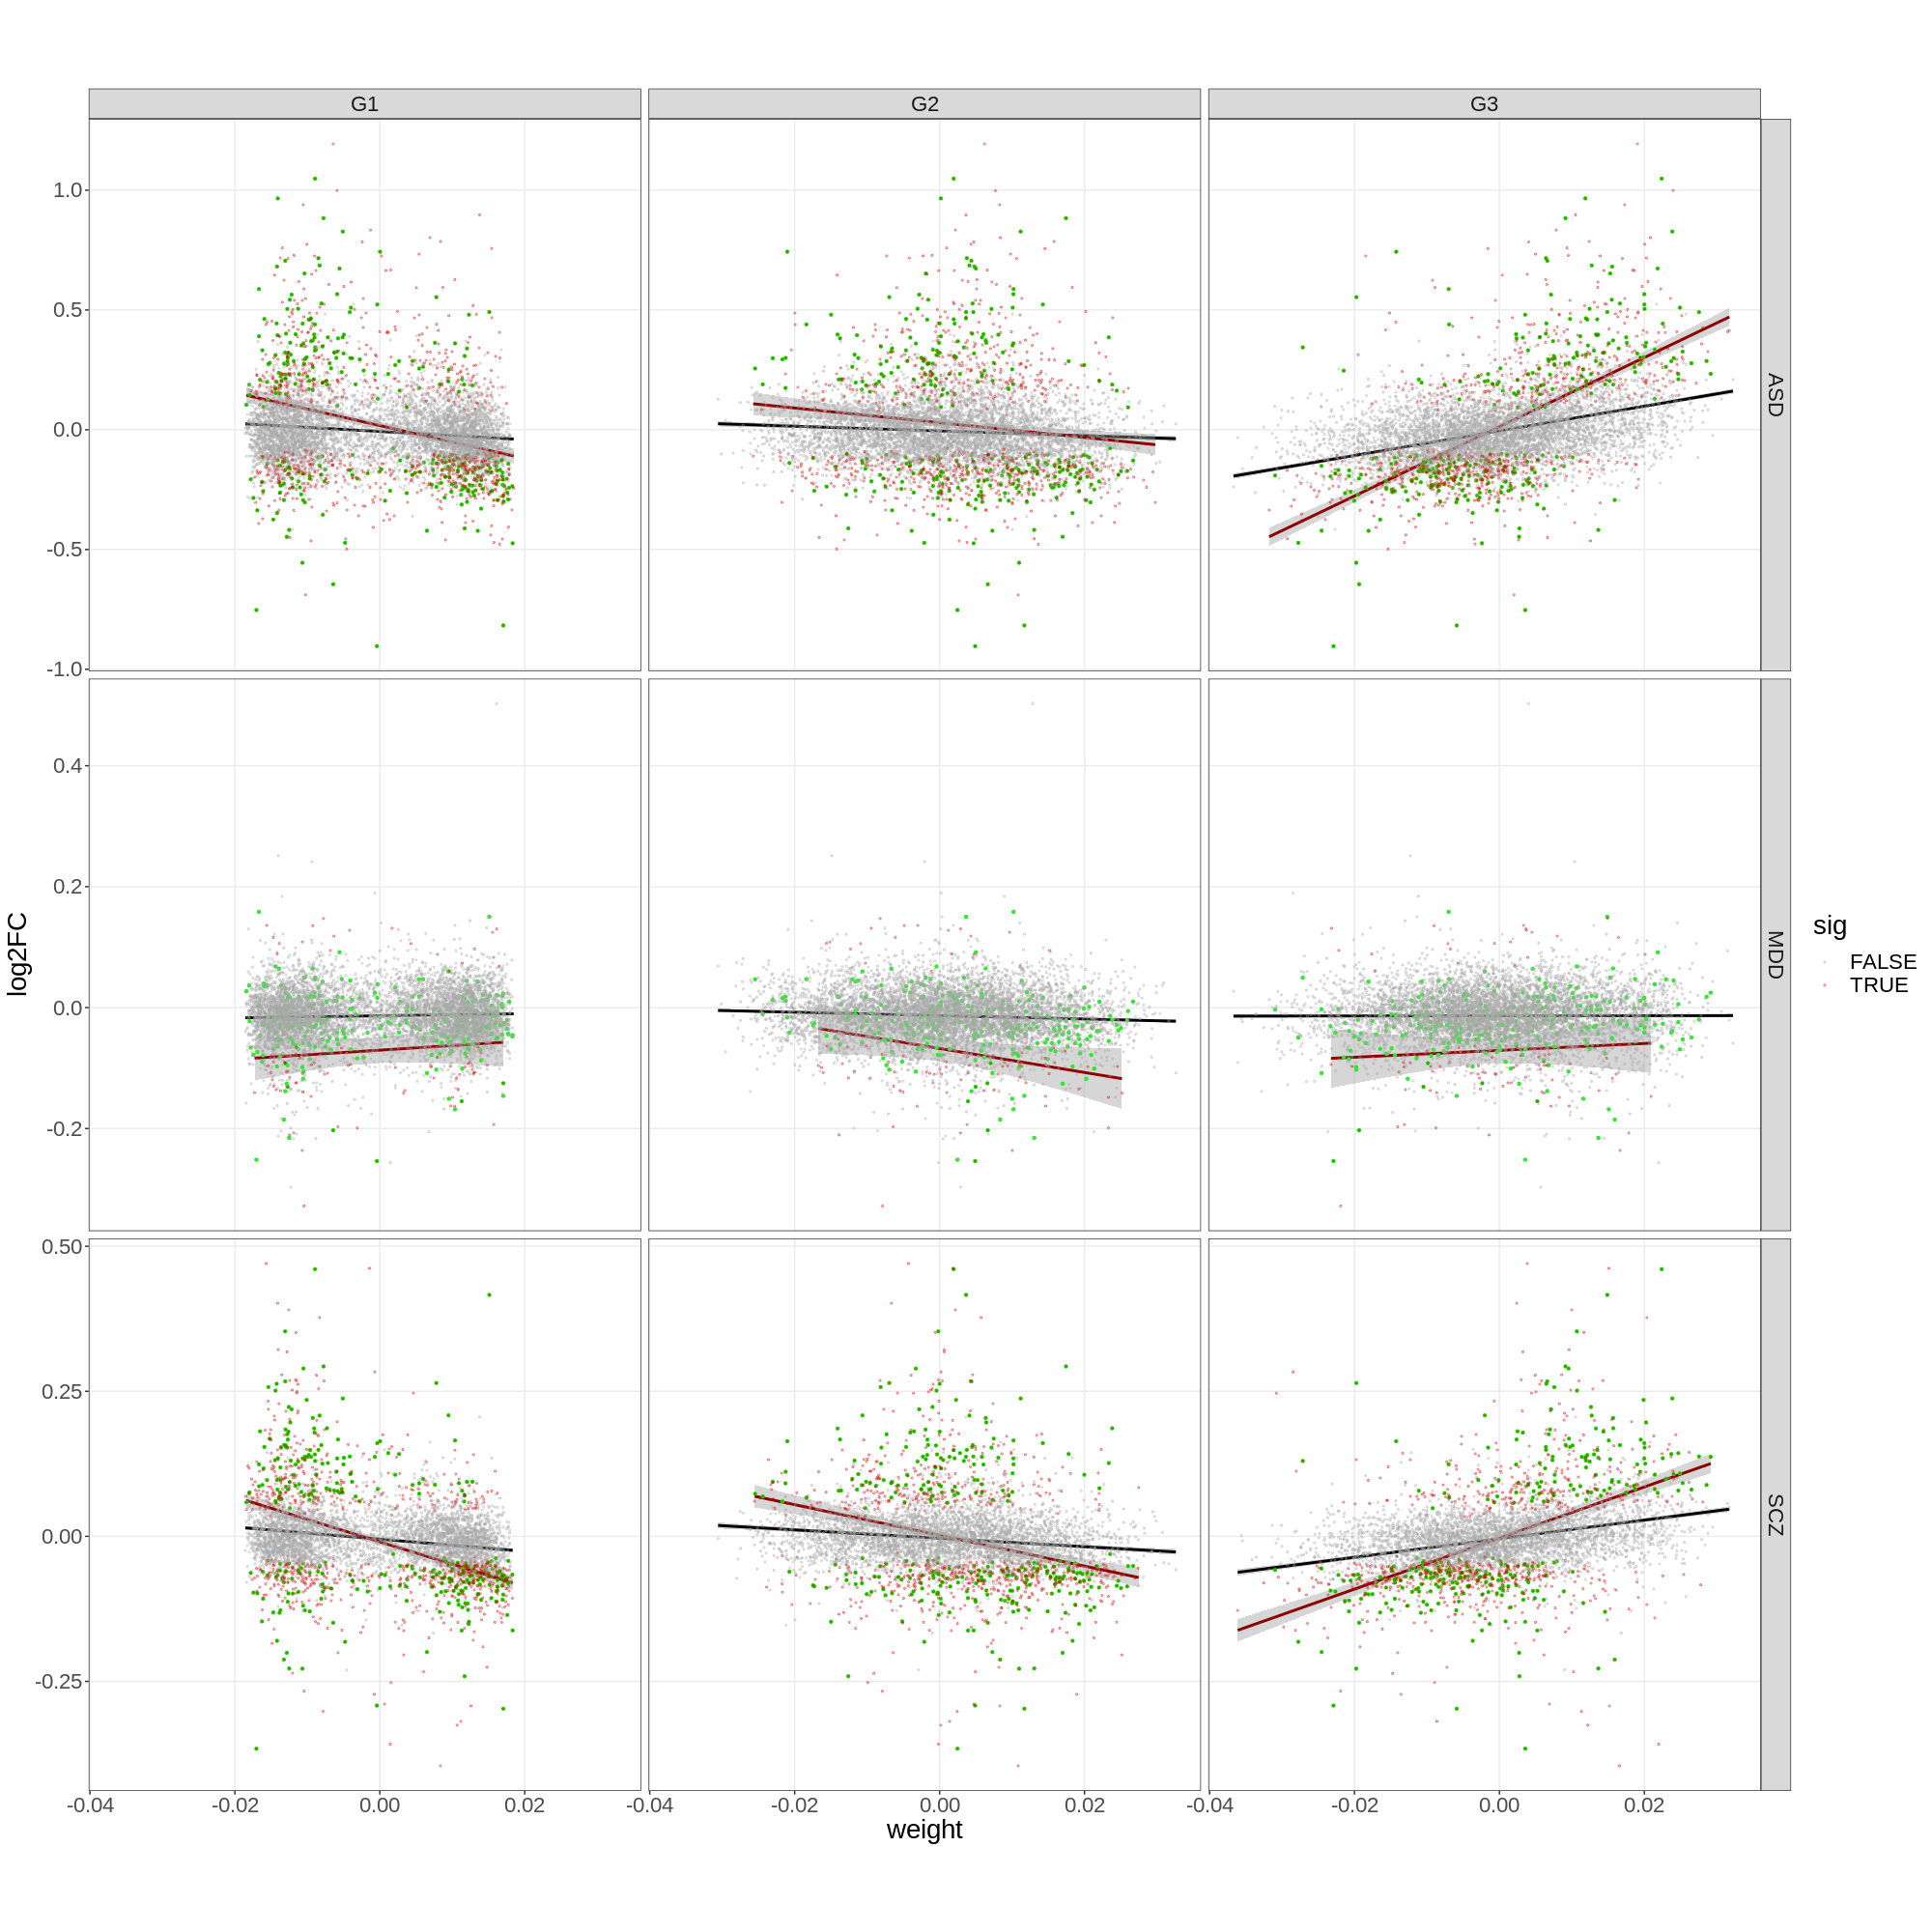

In [768]:
%%R -i df_weights_dge -w 20 -h 20 --units in -r 100
df_weights_dge %>%
ggplot(aes(x=weight, y=log2FC)) + 
facet_grid(disorder~G, scales='free_y') +
geom_smooth(method='lm', color='black') +
geom_smooth(method='lm', color='darkred', data = df_weights_dge %>% filter(sig)) +
geom_point(color='green', alpha=1, size=.8, data=df_weights_dge %>% filter(both_sig)) +
geom_point(aes(color=sig), alpha=.3, size=.5) +
scale_color_manual(values=c('darkgrey','red3')) +
# scale_color_gradientn(colors=rev(brewer.blues(100))) + 
# scale_alpha_manual(values=c(.2,1)) + 
theme_bw() +
theme(
    aspect.ratio=1,
    panel.grid.minor=element_blank(),
    text=element_text(size=20)
)

In [753]:
gandal_genes = gandal_genes_rna
disorders = ['ASD','SCZ']

weights_melt = weights.set_axis(['G1','G2','G3'],axis=1).stack().rename('weight').to_frame().rename_axis(['gene','G']).reset_index(1)

fdr_melt = (gandal_genes_rna
 .loc[:, [f'{d}.FDR' for d in disorders]]
 .rename({f'{d}.FDR':d for d in disorders},axis=1)
 .stack().rename('FDR').to_frame()
 .rename_axis(['gene','disorder'])
 .assign(sig = lambda x: x['FDR']<.05)
)

dge_melt = (gandal_genes_rna
 .loc[:, [f'{d}.log2FC' for d in disorders]]
 .rename({f'{d}.log2FC':d for d in disorders},axis=1)
 .stack().rename('log2FC').to_frame()
 .rename_axis(['gene','disorder'])
 .join(fdr_melt)
 .reset_index(1)
)


df_weights_dge = weights_melt.join(dge_melt).reset_index().dropna()

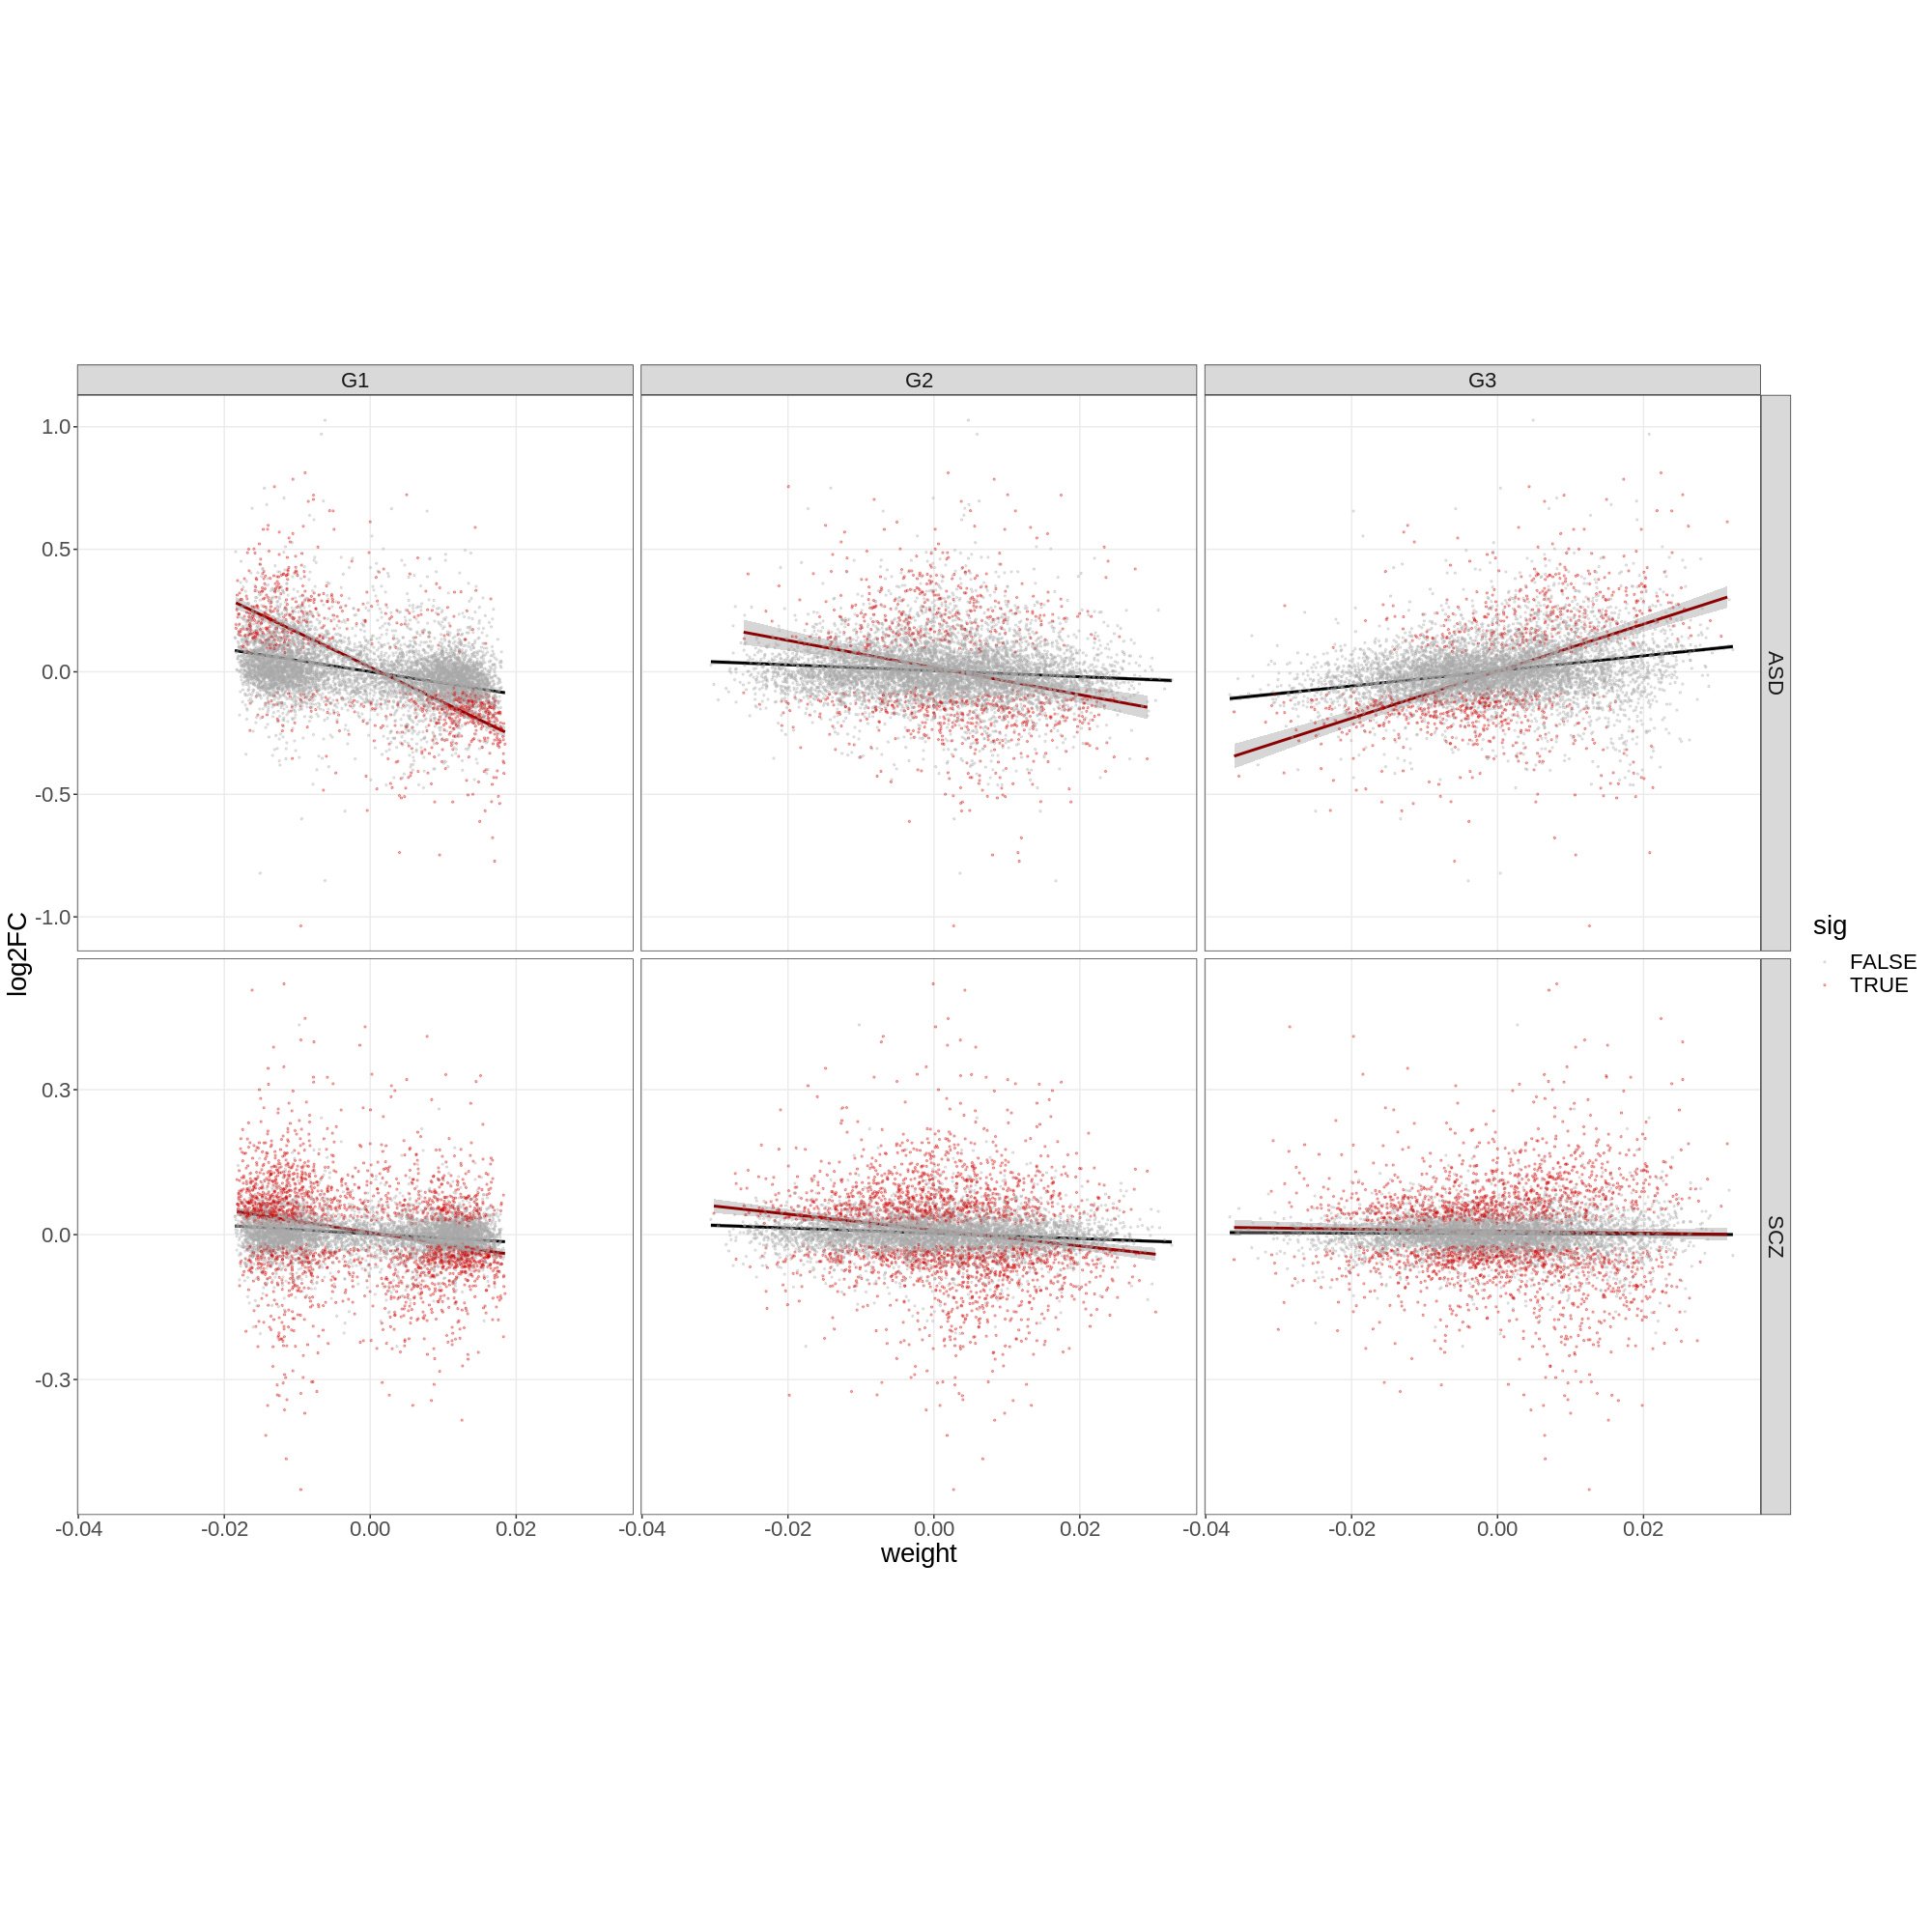

In [755]:
%%R -i df_weights_dge -w 20 -h 20 --units in -r 100
df_weights_dge %>%
ggplot(aes(x=weight, y=log2FC)) + 
facet_grid(disorder~G, scales='free_y') +
geom_smooth(method='lm', color='black') +
geom_smooth(method='lm', color='darkred', data = df_weights_dge %>% filter(sig)) +
geom_point(aes(color=sig), alpha=.3, size=.5) +
scale_color_manual(values=c('darkgrey','red3')) +
# scale_color_gradientn(colors=rev(brewer.blues(100))) + 
# scale_alpha_manual(values=c(.2,1)) + 
theme_bw() +
theme(
    aspect.ratio=1,
    panel.grid.minor=element_blank(),
    text=element_text(size=20)
)

### Correlations

In [801]:
gandal_genes = gandal_genes_micro
# null_weights = null_weights_sim

In [802]:
null_p_versions_dict = {    
    'Gene Corr (Random)': get_gene_corr(weights, null_weights_shuffle, gandal_genes),
    # 'Gene Corr (Sim PLS)': get_gene_corr(weights, null_weights_sim, gandal_genes),
    'Sig Gene Corr (Random)': get_gene_corr(weights, null_weights_shuffle, gandal_genes, sig_thresh=.05),
    # 'Sig Gene Corr (Sim PLS)': get_gene_corr(weights, null_weights_sim, gandal_genes, sig_thresh=.05), 
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

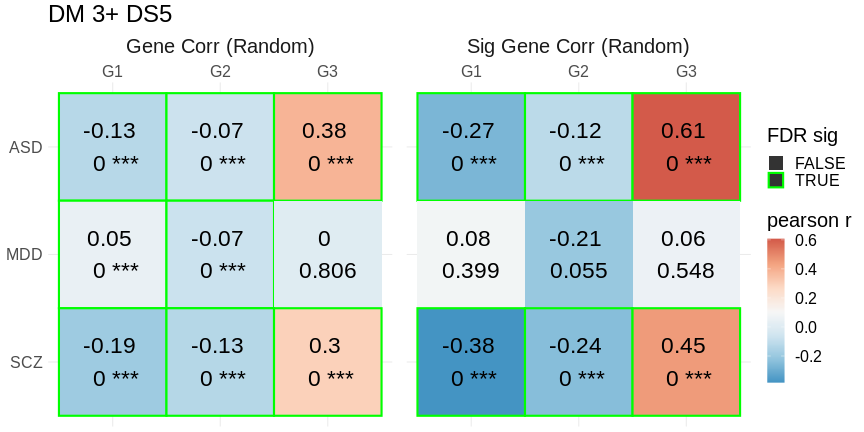

In [803]:
%%R -w 12 -h 6 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2) + ggtitle('DM 3+ DS5')

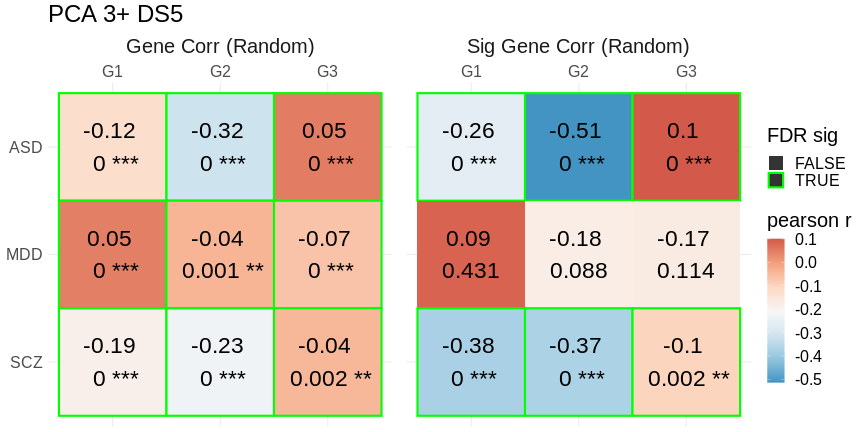

In [797]:
%%R -w 12 -h 6 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2) + ggtitle('PCA 3+ DS5')

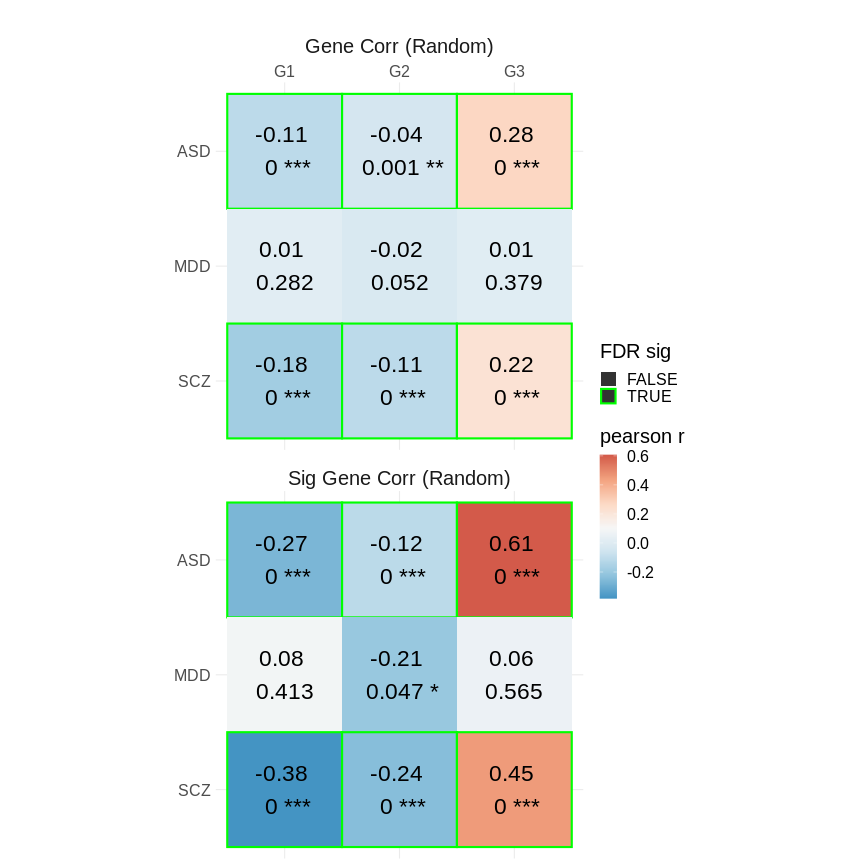

In [639]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=1) + ggtitle('')

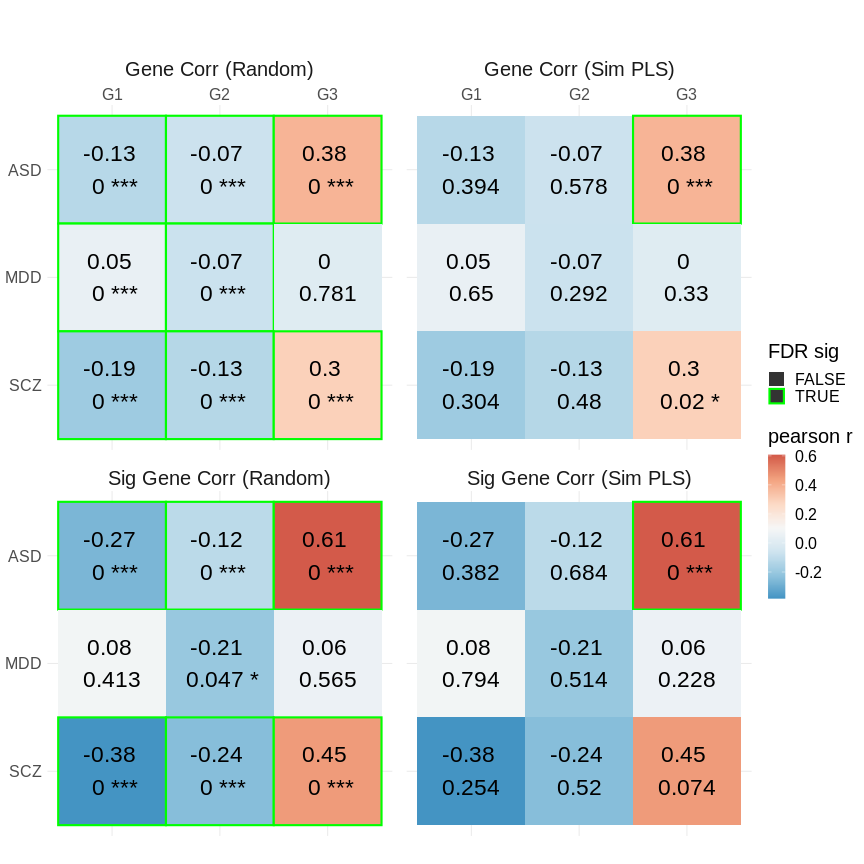

In [546]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2) + ggtitle('')

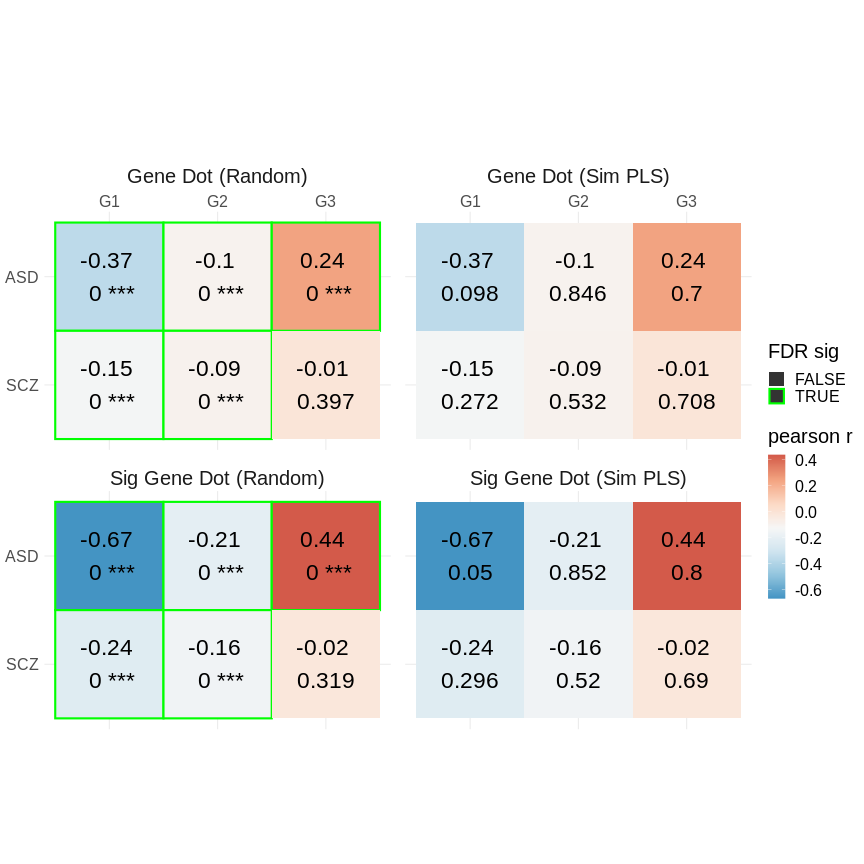

In [534]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2) + ggtitle('')

In [472]:
null_p_versions_dict['Microarray Sig Gene Corrs']

label   G    pct  true_mean  null_mean  null_std         z    pos      p  \
0   ASD  G1  0.025  -0.667938  -0.347901  0.290061 -1.103342  False  0.050   
1   ASD  G2  0.426  -0.213011  -0.031912  0.449658 -0.402748  False  0.852   
2   ASD  G3  0.600   0.435972   0.178996  0.408545  0.629004   True  0.800   
3   SCZ  G1  0.148  -0.239962  -0.115417  0.121123 -1.028251  False  0.296   
4   SCZ  G2  0.260  -0.158154  -0.025789  0.165849 -0.798108  False  0.520   
5   SCZ  G3  0.345  -0.021806   0.042780  0.162465 -0.397539  False  0.690   

       q    sig  
0  0.300  False  
1  0.852  False  
2  0.852  False  
3  0.852  False  
4  0.852  False  
5  0.852  False

### Dot products

In [539]:
gandal_genes = gandal_genes_rna

In [540]:
null_p_versions_dict = {
    'Gene Dot (Random)': get_gene_dot(weights, null_weights_shuffle, gandal_genes),
    'Gene Dot (Sim PLS)': get_gene_dot(weights, null_weights_sim, gandal_genes),
    'Sig Gene Dot (Random)': get_gene_dot(weights, null_weights_shuffle, gandal_genes, sig_thresh=.05),
    'Sig Gene Dot (Sim PLS)': get_gene_dot(weights, null_weights_sim, gandal_genes, sig_thresh=.05), 
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

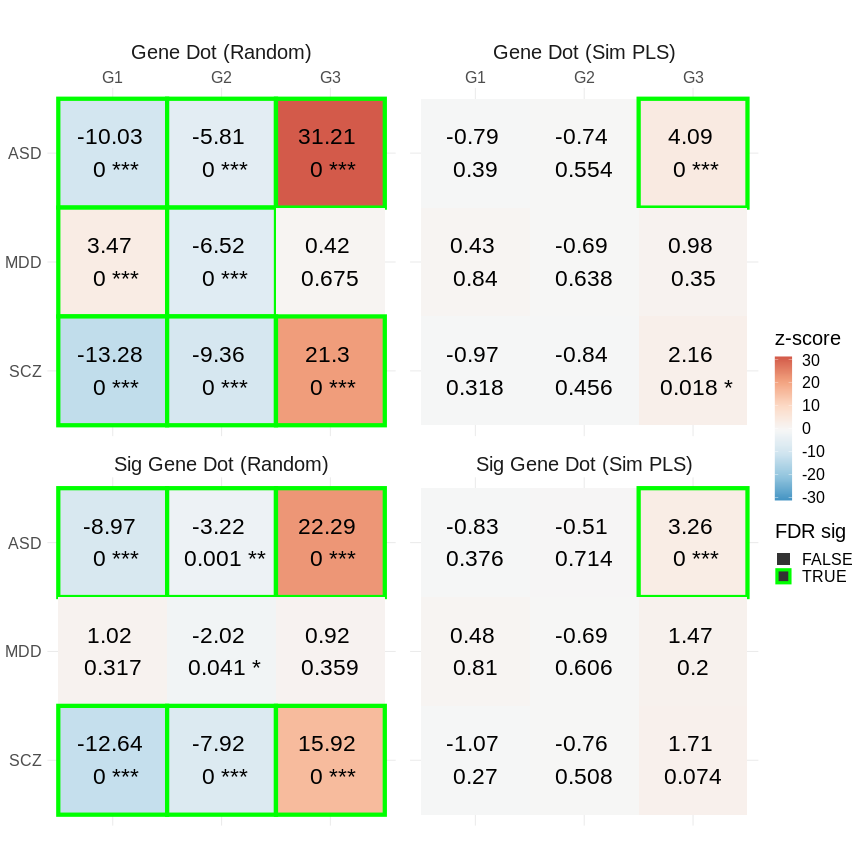

In [538]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) 
                         # fill_name='dot') + ggtitle('')

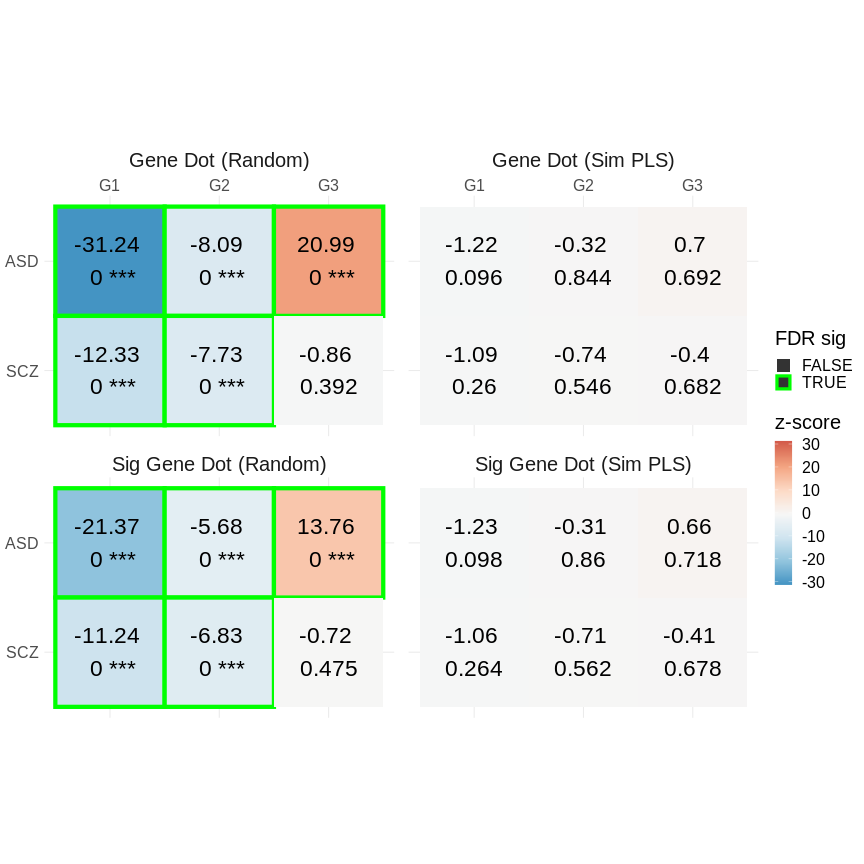

In [541]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) 
                         # fill_name='dot') + ggtitle('')

### Maps 

In [640]:
gene_maps_dict = {
    # 'Up-reg Genes': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='pos', return_maps=True),
    # 'Dn-reg Genes': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='neg', return_maps=True),
    'Up-reg Sig Genes': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='pos', sig_thresh=.05, return_maps=True),
    'Dn-reg Sig Genes': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='neg', sig_thresh=.05, return_maps=True)
}

gene_maps_plot = (pd.concat(gene_maps_dict)
                  .reset_index()
                  .rename({'level_0':'version'},axis=1)
)

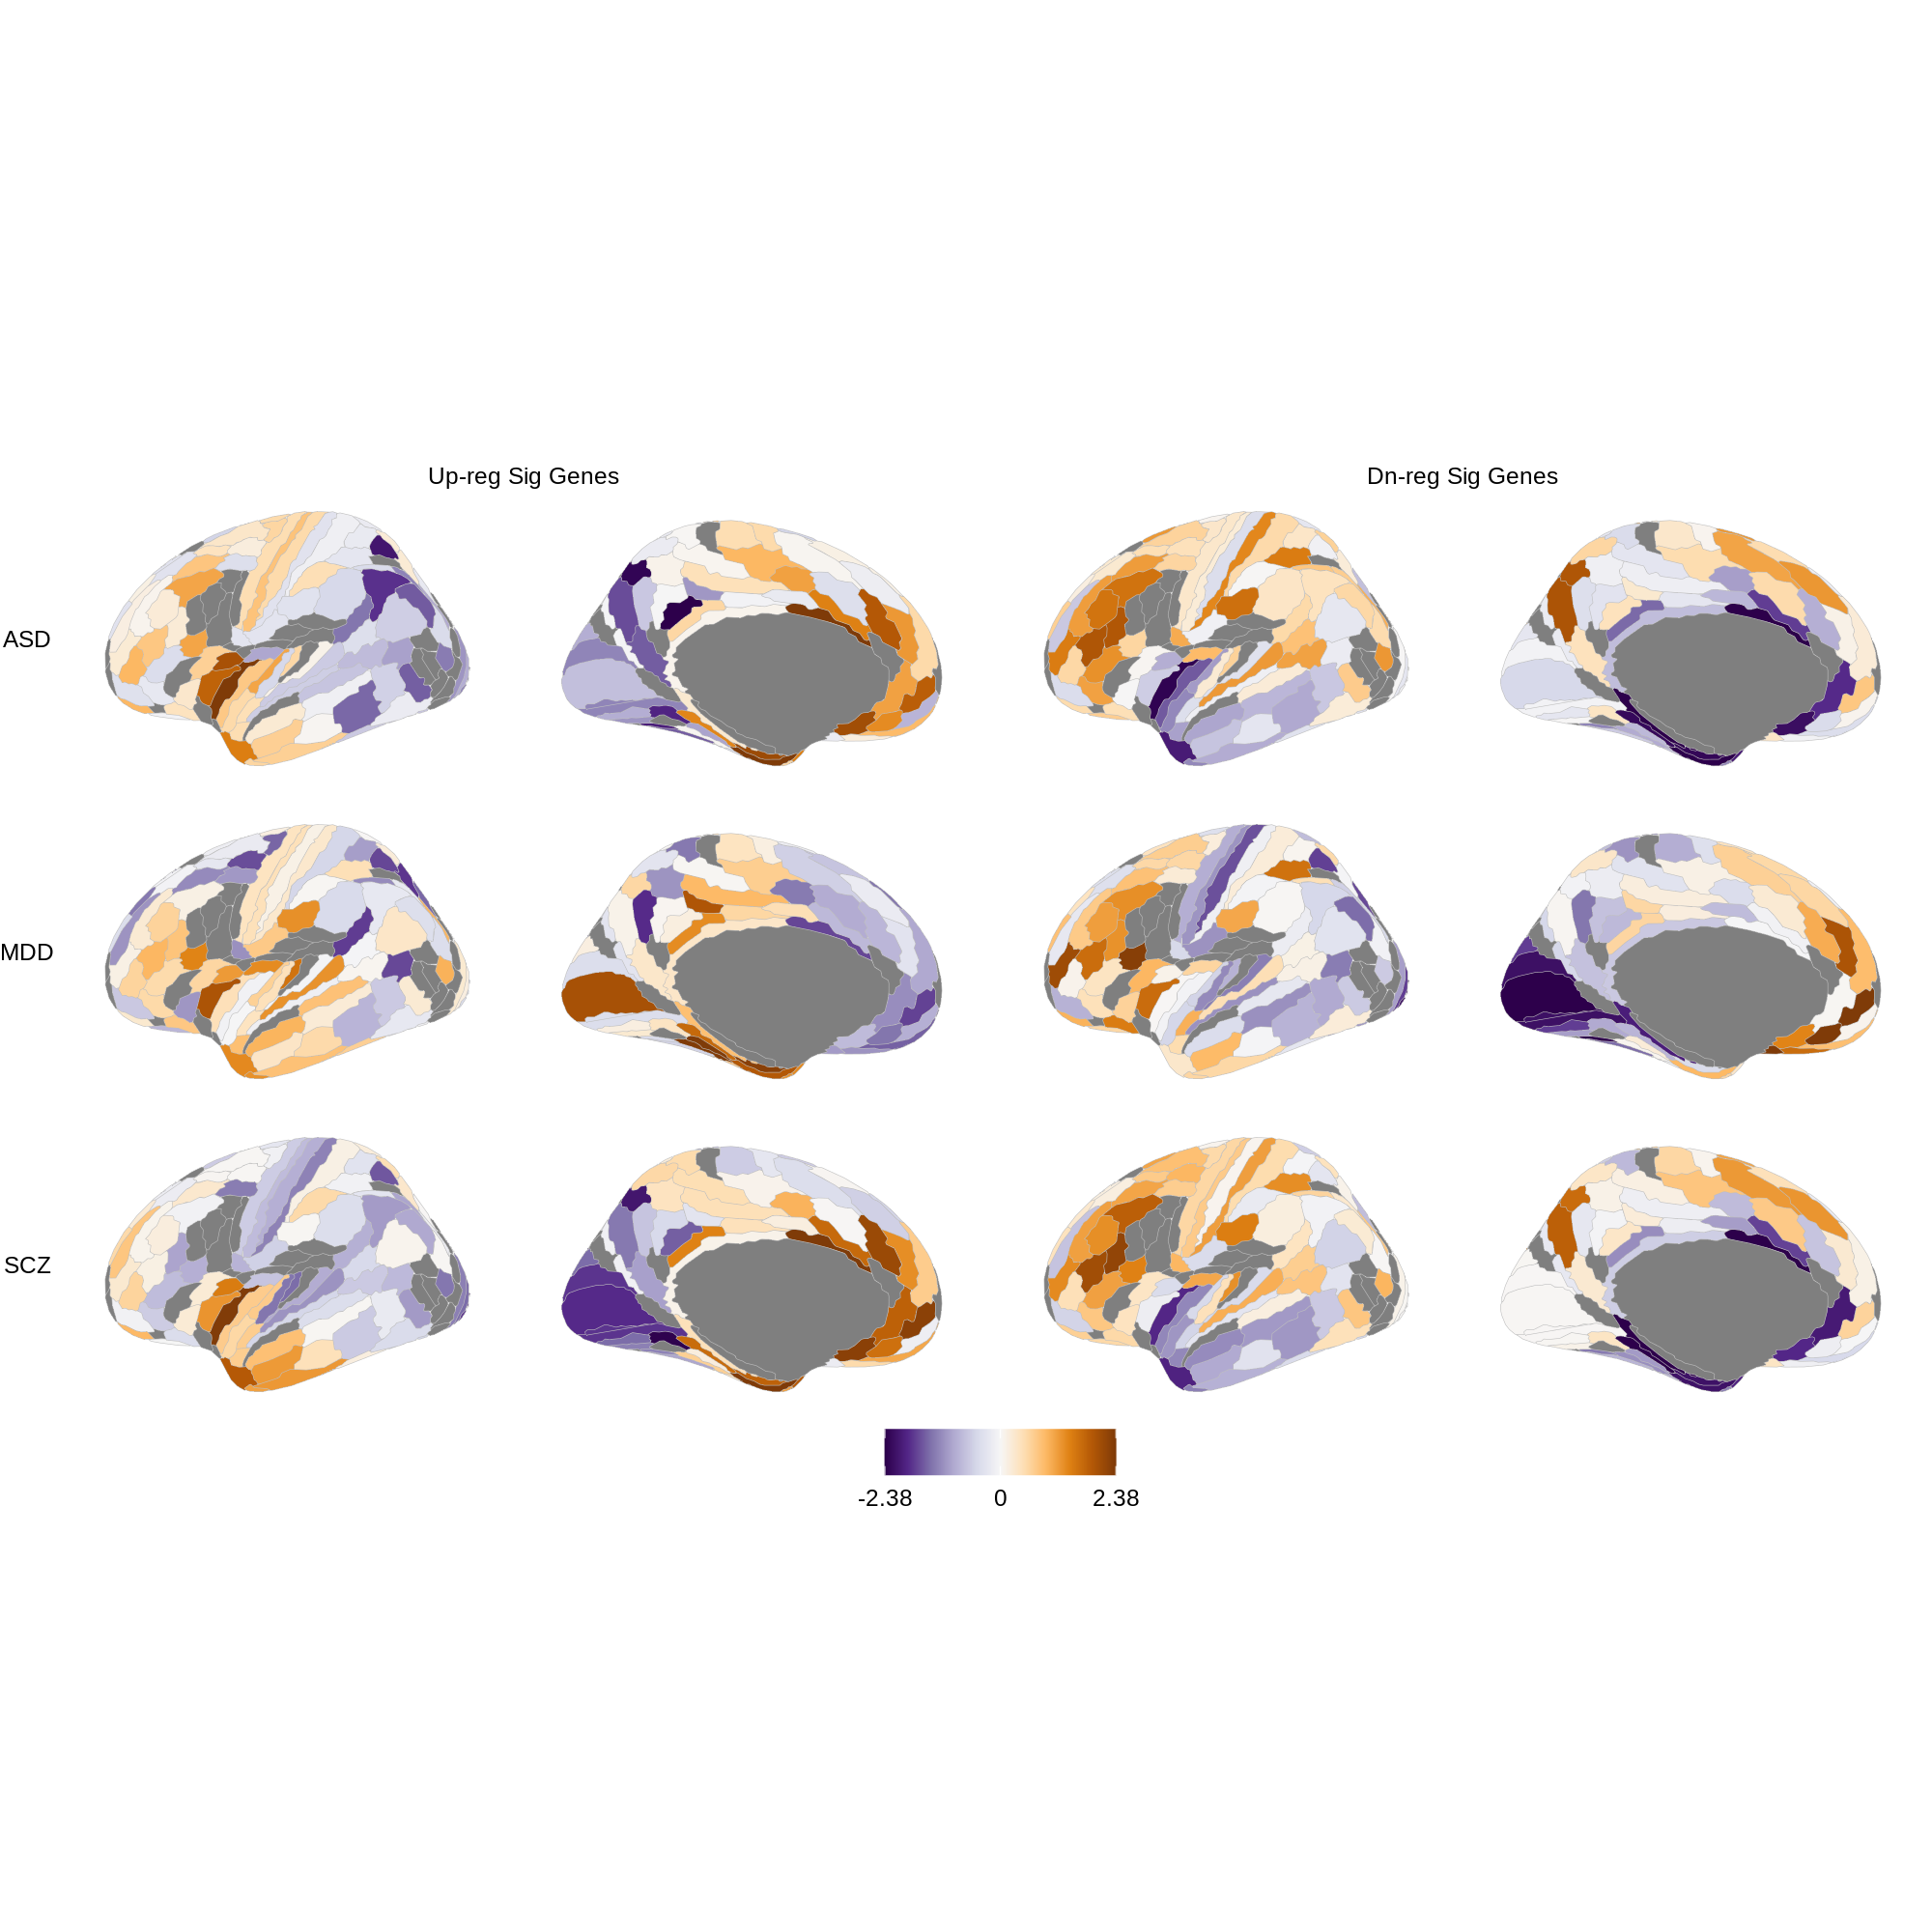

In [642]:
%%R -i gene_maps_plot -i scores -w 10 -h 10 --units in -r 200
source("../code/brainPlots.R")
# g1 <- plot_hcp(scores %>% mutate(version=''), switch='y')
# g2 <- plot_hcp(gene_maps_plot %>% filter(!grepl('Sig', version)), colors=rev(brewer.puor(100)), switch='y', facet='h')
# g2a <- plot_hcp(gene_maps_plot %>% filter(grepl('Sig', version)), colors=rev(brewer.puor(100)), switch='y', facet='h')
# (g2 / g2a) & theme(legend.position='right')
g2a

# g1 / g2 #+ plot_layout(widths=c(1,2))

In [644]:
null_scores = null_scores_sim
null_p_versions_dict = {    
    # 'Up-reg Genes': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='pos'),
    # 'Dn-reg Genes': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='neg'),
    'Up-reg Sig Genes': get_gene_map_corr(version, null_scores_spin, gandal_genes_micro, posneg='pos', sig_thresh=.05),
    'Dn-reg Sig Genes': get_gene_map_corr(version, null_scores_spin, gandal_genes_micro, posneg='neg', sig_thresh=.05)
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

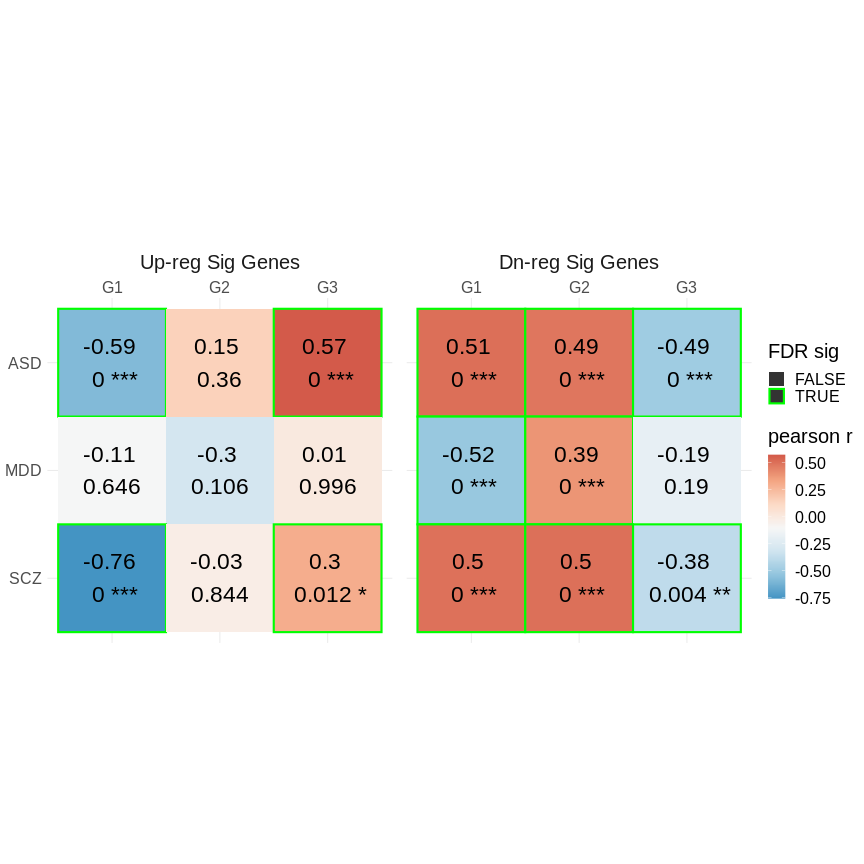

In [645]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2) + ggtitle('')

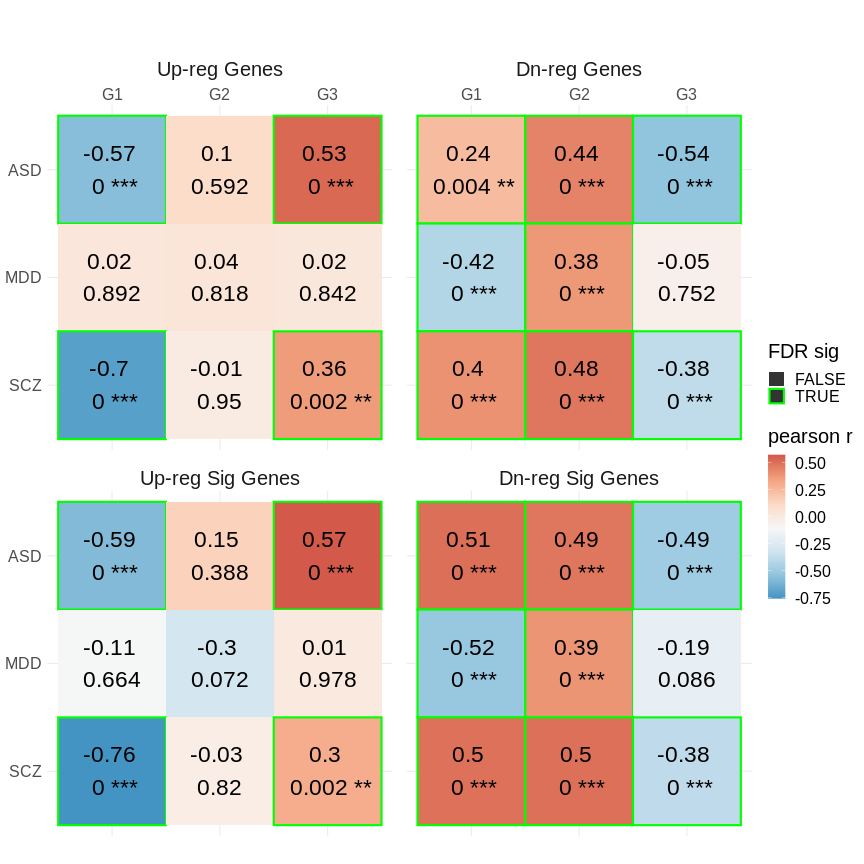

In [584]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2) + ggtitle('')

In [152]:
gene_maps_dict = {
    'Microarray': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='', sig_thresh=.05, return_maps=True),    
    'RNAseq': get_gene_map_corr(version, null_scores, gandal_genes_rna, posneg='', sig_thresh=.05, return_maps=True)
}

gene_maps_plot = (pd.concat(gene_maps_dict)
                  .reset_index()
                  .rename({'level_0':'version'},axis=1)
)

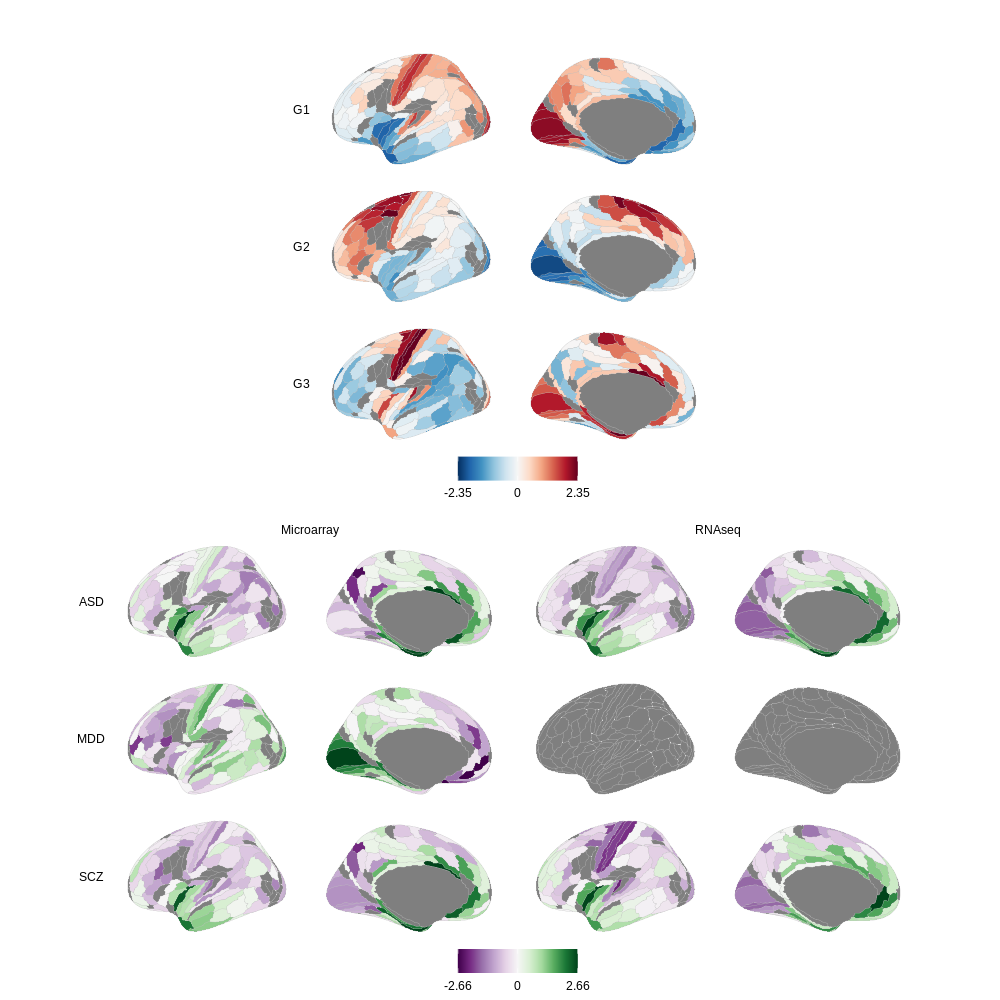

In [153]:
%%R -i gene_maps_plot -i scores -w 10 -h 10 --units in -r 100
source("../code/brainPlots.R")
g1 <- plot_hcp(scores %>% mutate(version=''), switch='y')
g2 <- plot_hcp(gene_maps_plot, colors=brewer.prgn(100), switch='y')

g1 / g2 #+ plot_layout(widths=c(1,2))

In [39]:
null_p_versions_dict = {
    'Microarray Map Corrs': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='', sig_thresh=.05),    
    'RNAseq Map Corrs': get_gene_map_corr(version, null_scores, gandal_genes_rna, posneg='', sig_thresh=.05),    
    'Microarray Gene Corrs': get_gene_corr(weights, null_weights, gandal_genes_micro, sig_thresh=.05),
    'RNAseq Gene Corrs': get_gene_corr(weights, null_weights, gandal_genes_rna, sig_thresh=.05)    
    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

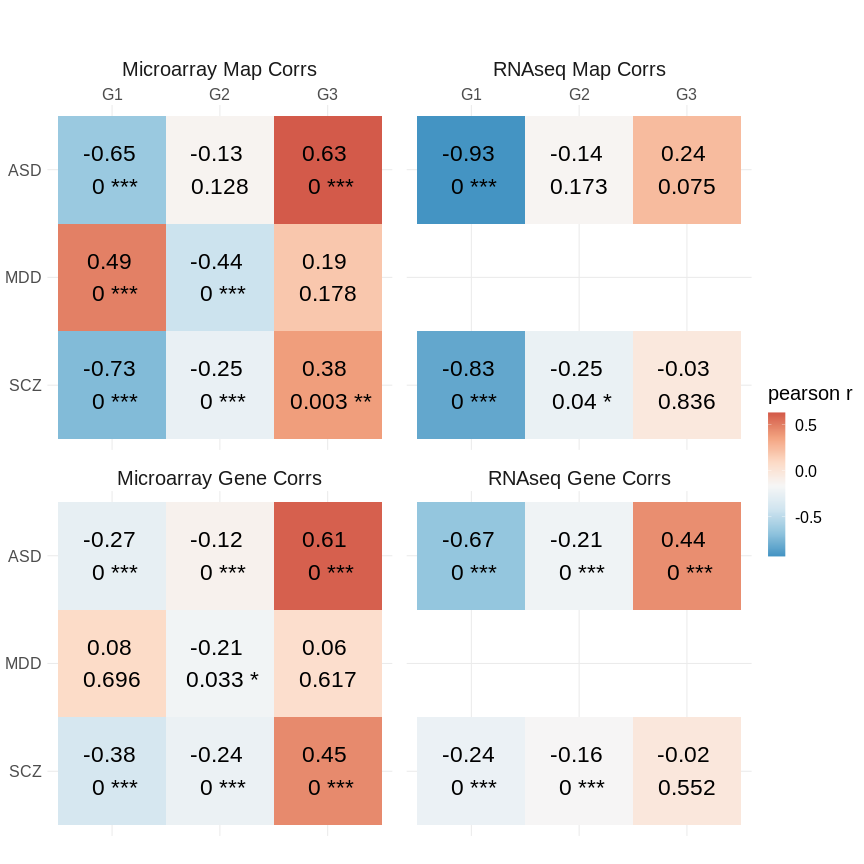

In [155]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2) + ggtitle('')

In [634]:
null_weights = null_weights_shuffle[:,:,:5000]

In [782]:
null_p_versions_dict = {
    'Sig Upreg Genes, Pos Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='pos'),
    'Sig Upreg Genes, Neg Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='neg'),
    'Sig Dnreg Genes, Pos Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='pos'),
    'Sig Dnreg Genes, Neg Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='neg')
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

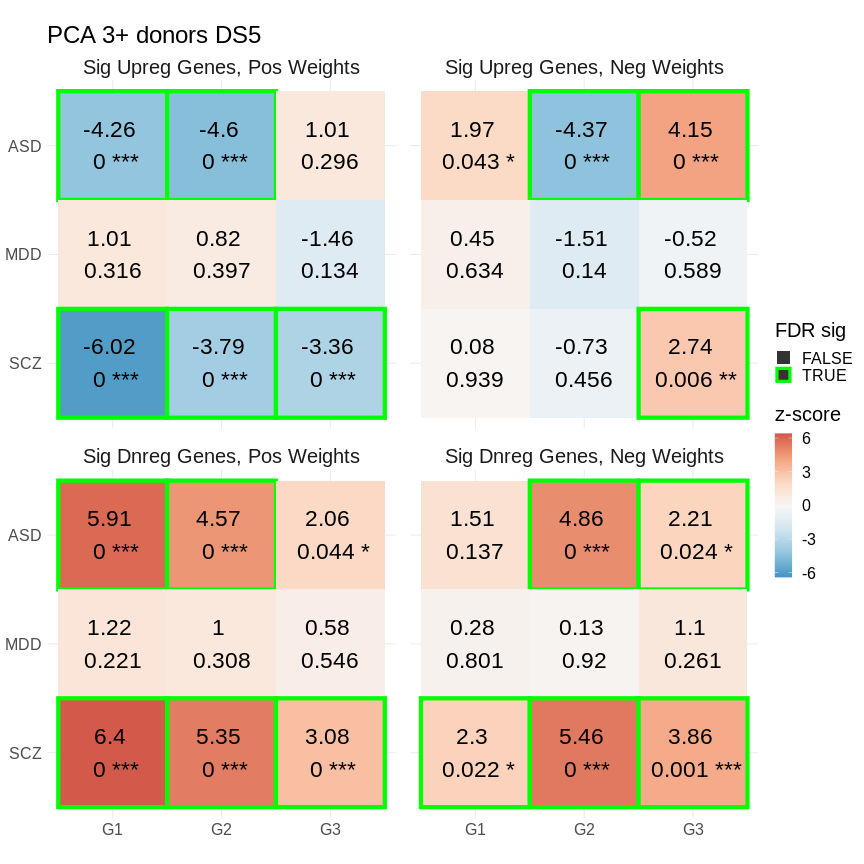

In [783]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('PCA 3+ donors DS5')

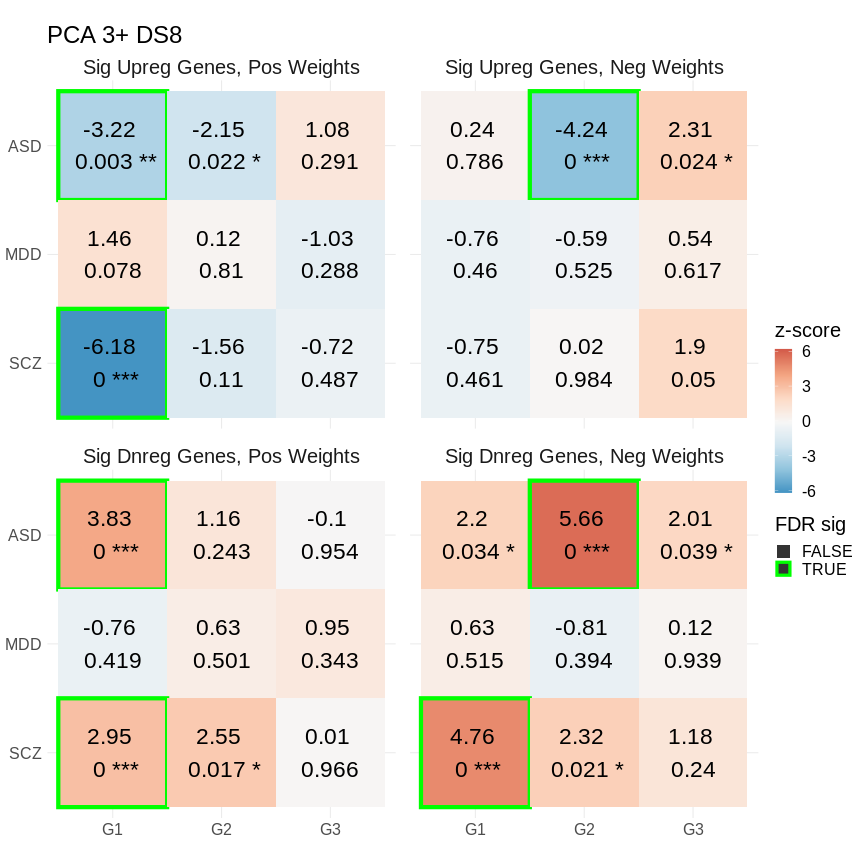

In [777]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('PCA 3+ donors DS8')

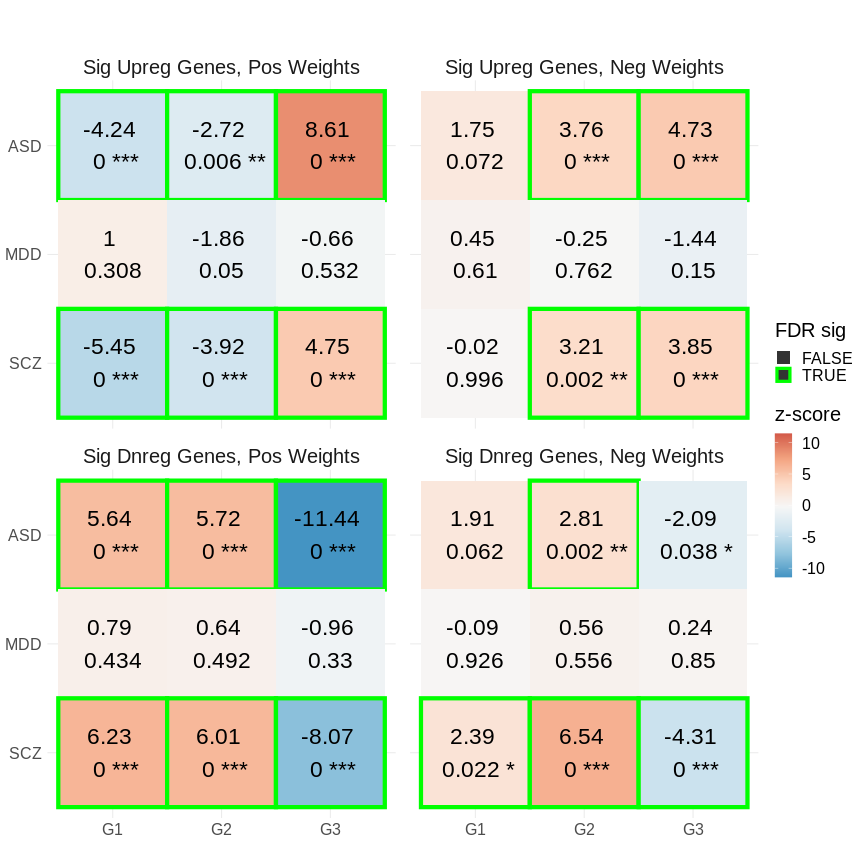

In [771]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [736]:
null_p_versions_dict = {
    'Sig Upreg Genes, Pos Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='pos', combine='union'),
    'Sig Upreg Genes, Neg Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='neg', combine='union'),
    'Sig Dnreg Genes, Pos Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='pos', combine='union'),
    'Sig Dnreg Genes, Neg Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='neg', combine='union')
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

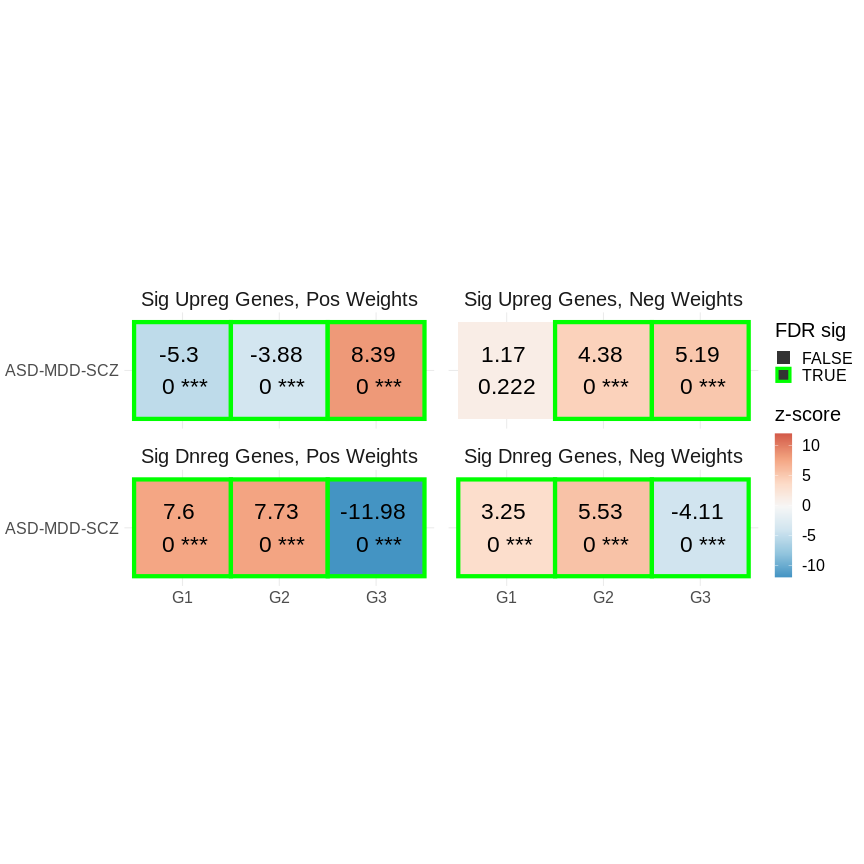

In [737]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [742]:
null_p_versions_dict = {
    'Sig Upreg Genes, Pos Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='pos', combine='ASD-SCZ intersection'),
    'Sig Upreg Genes, Neg Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='neg', combine='ASD-SCZ intersection'),
    'Sig Dnreg Genes, Pos Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='pos', combine='ASD-SCZ intersection'),
    'Sig Dnreg Genes, Neg Weights': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='neg', combine='ASD-SCZ intersection')
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

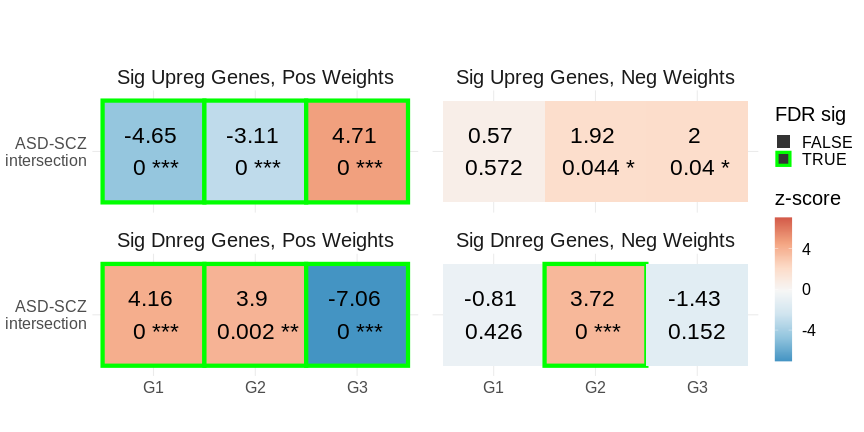

In [769]:
%%R -w 12 -h 6 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [605]:
null_p_versions_dict = {
    'Microarray Gene Sig Upreg, Pos': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='pos'),
    'Microarray Gene Sig Upreg, Neg': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='neg'),
    'Microarray Gene Sig Dnreg, Pos': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='pos'),
    'Microarray Gene Sig Dnreg, Neg': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='neg'),    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

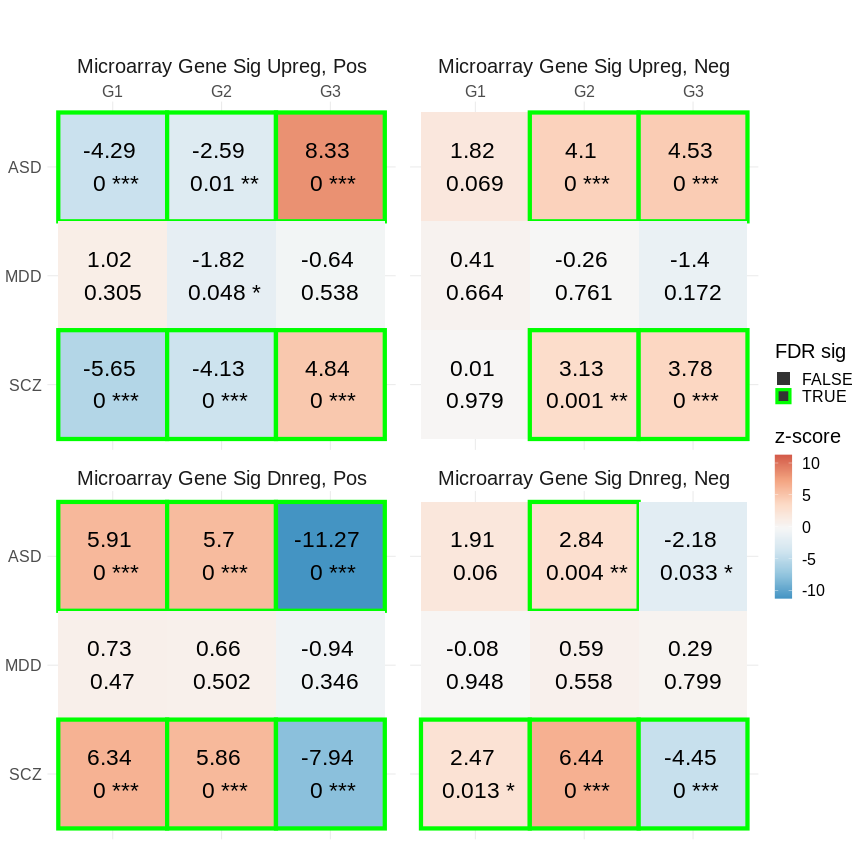

In [606]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [632]:
null_p_versions_dict = {
    'Gene Sig Upreg, Pos': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='pos', posneg_weights='pos'),
    'Gene Sig Upreg, Neg': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='pos', posneg_weights='neg'),
    'Gene Sig Dnreg, Pos': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='neg', posneg_weights='pos'),
    'Gene Sig Dnreg, Neg': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='neg', posneg_weights='neg'),    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

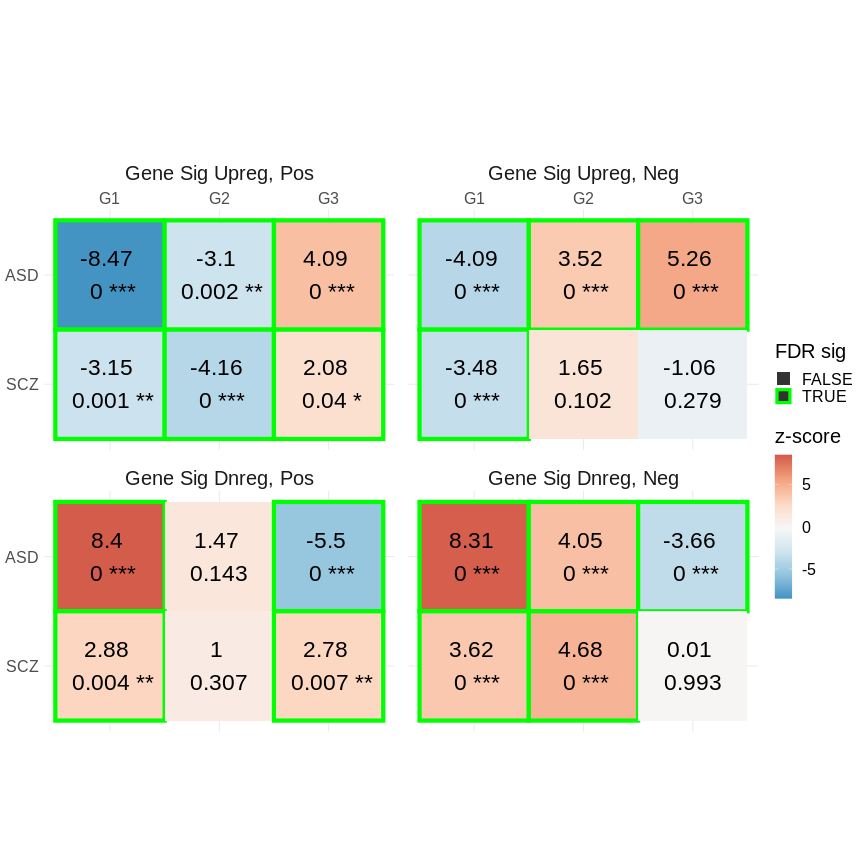

In [633]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [596]:
null_p_versions_dict = {
    'Microarray Gene Dot Upreg, Pos': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='pos'),
    'Microarray Gene Dot Upreg, Neg': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='neg'),
    'Microarray Gene Dot Dnreg, Pos': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='pos'),
    'Microarray Gene Dot Dnreg, Neg': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='neg'),    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

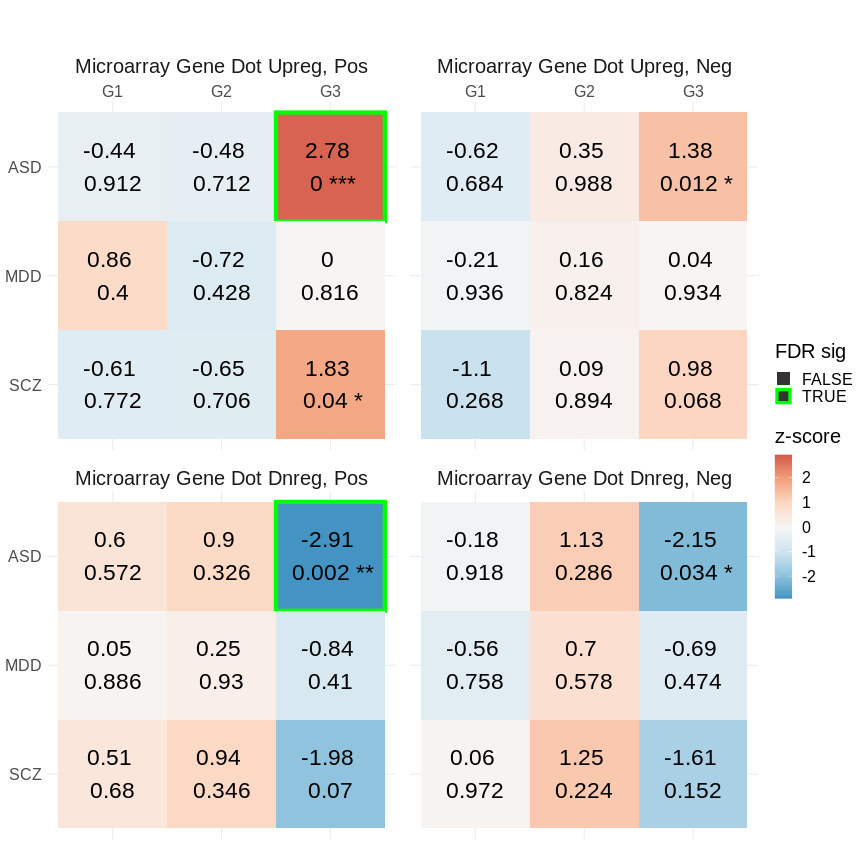

In [598]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [599]:
null_p_versions_dict = {
    'RNAseq Gene Dot Upreg, Pos': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='pos', posneg_weights='pos'),
    'RNAseq Gene Dot Upreg, Neg': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='pos', posneg_weights='neg'),
    'RNAseq Gene Dot Dnreg, Pos': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='neg', posneg_weights='pos'),
    'RNAseq Gene Dot Dnreg, Neg': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='neg', posneg_weights='neg'),  
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

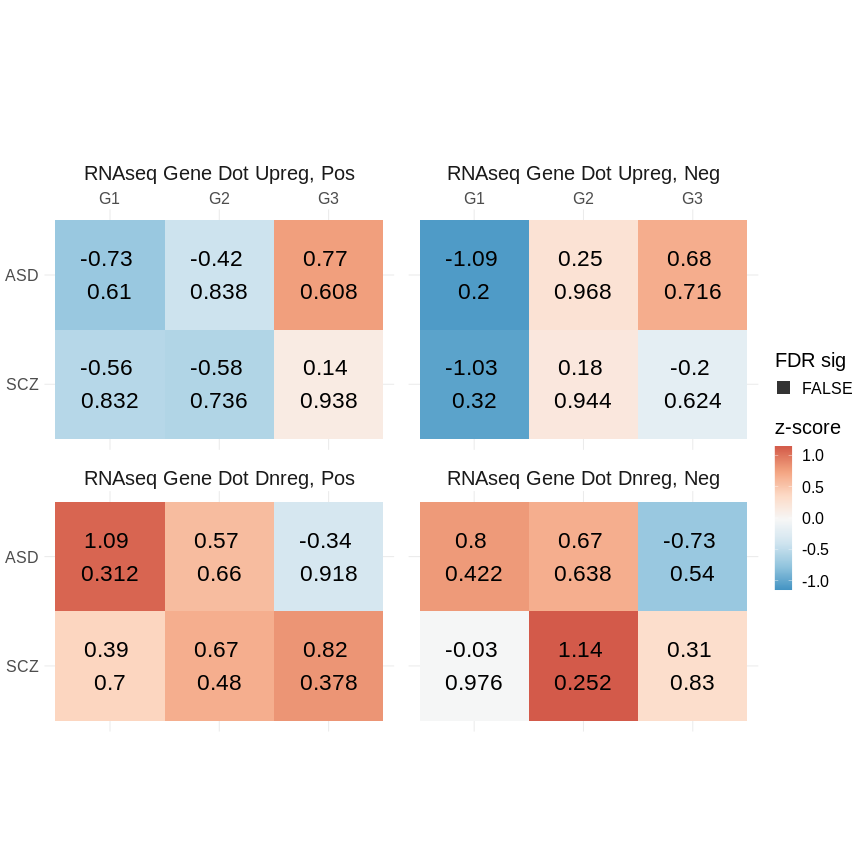

In [600]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [64]:
null_p_versions_dict = {
    'Microarray Gene Abs Dot': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='abs', absolute=True),
    'RNAseq Gene Abs Dot': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='abs', absolute=True),
    'Microarray Gene Sig Abs Dot': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='abs', absolute=True, sig_thresh=.05),
    'RNAseq Gene Sig Abs Dot': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='abs', absolute=True, sig_thresh=.05)
    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

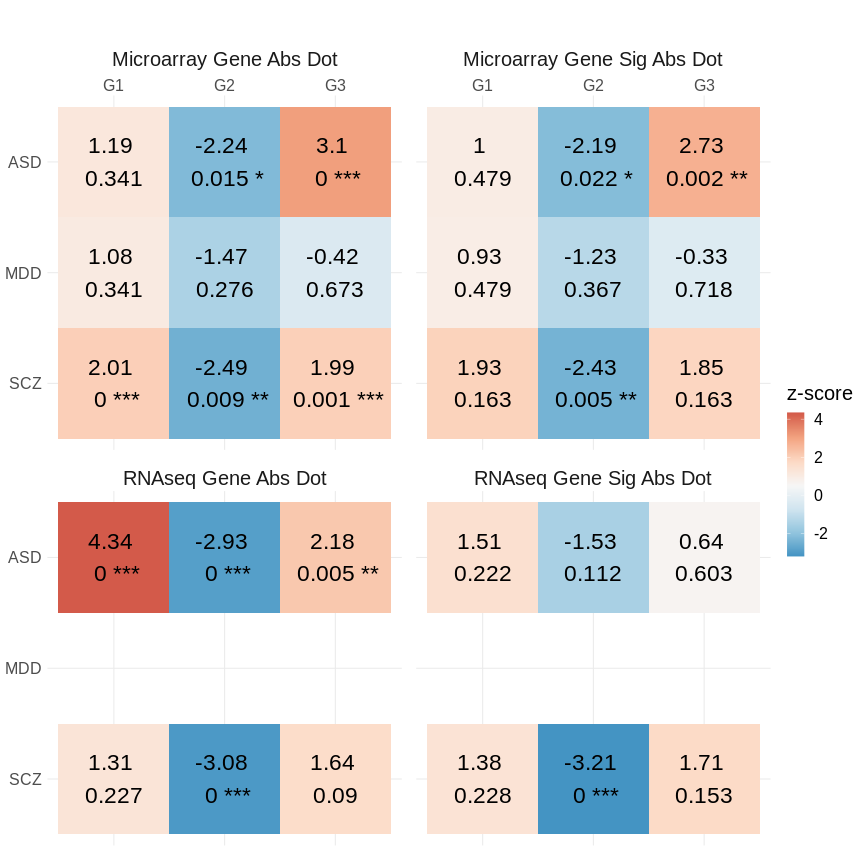

In [65]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [31]:
null_p_versions_dict = {
    'Microarray Gene': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='abs'),
    'RNAseq Gene': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='abs'),
    'Microarray Gene Sig Abs': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='abs', absolute=True, sig_thresh=.05),
    'RNAseq Gene Sig Abs': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='abs', absolute=True, sig_thresh=.05)
    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

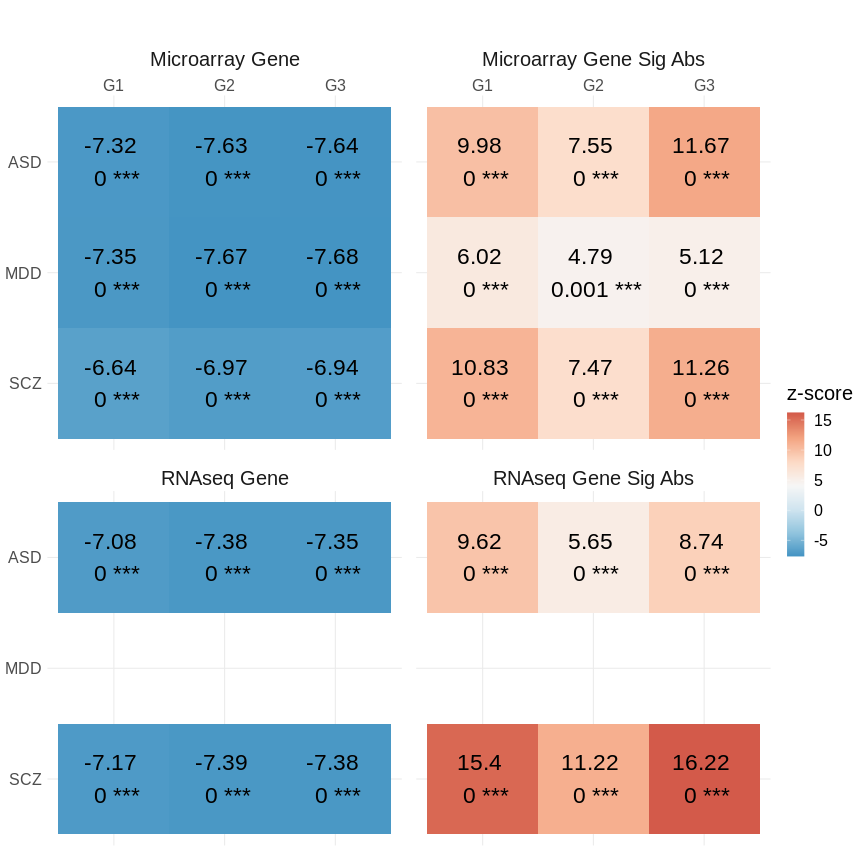

In [32]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

## Gandal genes - RNAseq

In [12]:
gandal_genes = get_gandal_genes(which='rnaseq')

In [415]:
null_weights = null_weights_sim

In [416]:
null_p_sig_pos = get_gene_sig(weights, null_weights, gandal_genes, posneg='pos')
null_p_sig_neg = get_gene_sig(weights, null_weights, gandal_genes, posneg='neg')
null_p_sig_abs = get_gene_sig(weights, null_weights, gandal_genes, posneg='abs')

In [417]:
null_p_dot_pos = get_gene_dot(weights, null_weights, gandal_genes, posneg='pos')
null_p_dot_neg = get_gene_dot(weights, null_weights, gandal_genes, posneg='neg')
null_p_dot_abs = get_gene_dot(weights, null_weights, gandal_genes, posneg='abs')

In [418]:
null_p_dotsig_pos = get_gene_dot(weights, null_weights, gandal_genes, posneg='pos', sig_thresh=.05)
null_p_dotsig_neg = get_gene_dot(weights, null_weights, gandal_genes, posneg='neg', sig_thresh=.05)
null_p_dotsig_abs = get_gene_dot(weights, null_weights, gandal_genes, posneg='abs', sig_thresh=.05)

In [419]:
null_p_map_pos = get_gene_map_corr(version, null_scores, gandal_genes, posneg='pos')
null_p_map_neg = get_gene_map_corr(version, null_scores, gandal_genes, posneg='neg')
null_p_map_abs = get_gene_map_corr(version, null_scores, gandal_genes, posneg='')

In [420]:
null_p_versions_dict = {
    'Sig log2FC Up': null_p_sig_pos,
    'Sig log2FC Down': null_p_sig_neg,
    'Sig log2FC Abs': null_p_sig_abs,
    'Dot log2FC Up': null_p_dot_pos,
    'Dot log2FC Down': null_p_dot_neg,
    'Dot log2FC Abs': null_p_dot_abs,
    'Dot Sig log2FC Up': null_p_dotsig_pos,
    'Dot Sig log2FC Down': null_p_dotsig_neg,
    'Dot Sig log2FC Abs': null_p_dotsig_abs,    
    'Cor Gene Map Up': null_p_map_pos,
    'Cor Gene Map Down': null_p_map_neg,
    'Cor Gene Map Abs': null_p_map_abs,
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

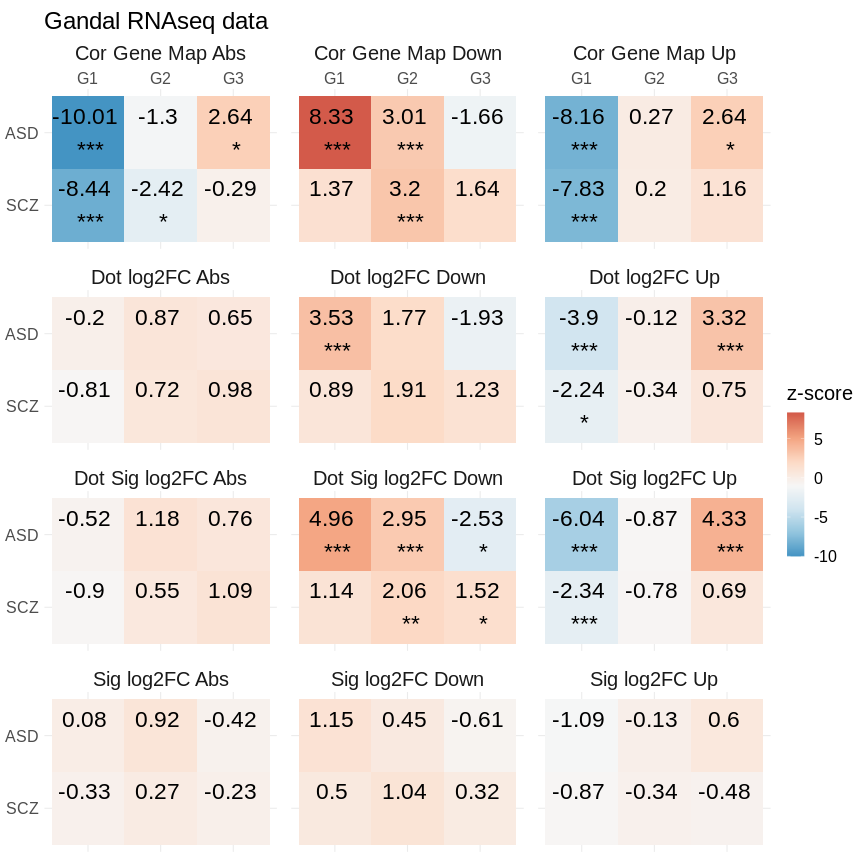

In [425]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Gandal RNAseq data')

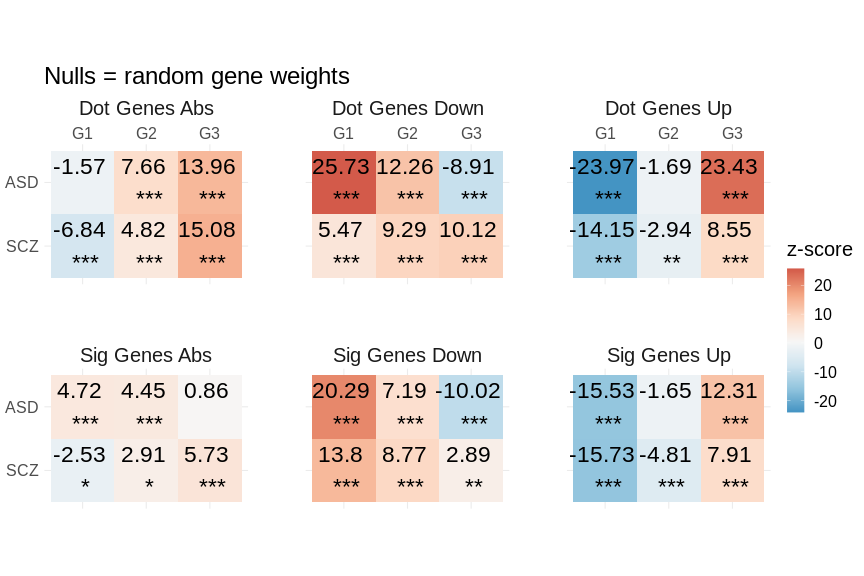

In [138]:
%%R -w 12 -h 8 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Nulls = random gene weights')

## Get Gandal genes - microarray

In [426]:
gandal_genes = get_gandal_genes(which='microarray')

In [427]:
# null_weights = null_weights_shuffle
null_weights = null_weights_sim

In [428]:
null_p_sig_pos = get_gene_sig(weights, null_weights, gandal_genes, posneg='pos')
null_p_sig_neg = get_gene_sig(weights, null_weights, gandal_genes, posneg='neg')
null_p_sig_abs = get_gene_sig(weights, null_weights, gandal_genes, posneg='abs')

In [429]:
null_p_dot_pos = get_gene_dot(weights, null_weights, gandal_genes, posneg='pos')
null_p_dot_neg = get_gene_dot(weights, null_weights, gandal_genes, posneg='neg')
null_p_dot_abs = get_gene_dot(weights, null_weights, gandal_genes, posneg='abs')

In [430]:
null_p_dotsig_pos = get_gene_dot(weights, null_weights, gandal_genes, posneg='pos', sig_thresh=.05)
null_p_dotsig_neg = get_gene_dot(weights, null_weights, gandal_genes, posneg='neg', sig_thresh=.05)
null_p_dotsig_abs = get_gene_dot(weights, null_weights, gandal_genes, posneg='abs', sig_thresh=.05)

In [431]:
null_p_map_pos = get_gene_map_corr(version, null_scores, gandal_genes, posneg='pos')
null_p_map_neg = get_gene_map_corr(version, null_scores, gandal_genes, posneg='neg')
null_p_map_abs = get_gene_map_corr(version, null_scores, gandal_genes, posneg='')

In [432]:
null_p_versions_dict = {
    'Sig log2FC Up': null_p_sig_pos,
    'Sig log2FC Down': null_p_sig_neg,
    'Sig log2FC Abs': null_p_sig_abs,
    'Dot log2FC Up': null_p_dot_pos,
    'Dot log2FC Down': null_p_dot_neg,
    'Dot log2FC Abs': null_p_dot_abs,
    'Dot Sig log2FC Up': null_p_dotsig_pos,
    'Dot Sig log2FC Down': null_p_dotsig_neg,
    'Dot Sig log2FC Abs': null_p_dotsig_abs,    
    'Cor Gene Map Up': null_p_map_pos,
    'Cor Gene Map Down': null_p_map_neg,
    'Cor Gene Map Abs': null_p_map_abs,
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

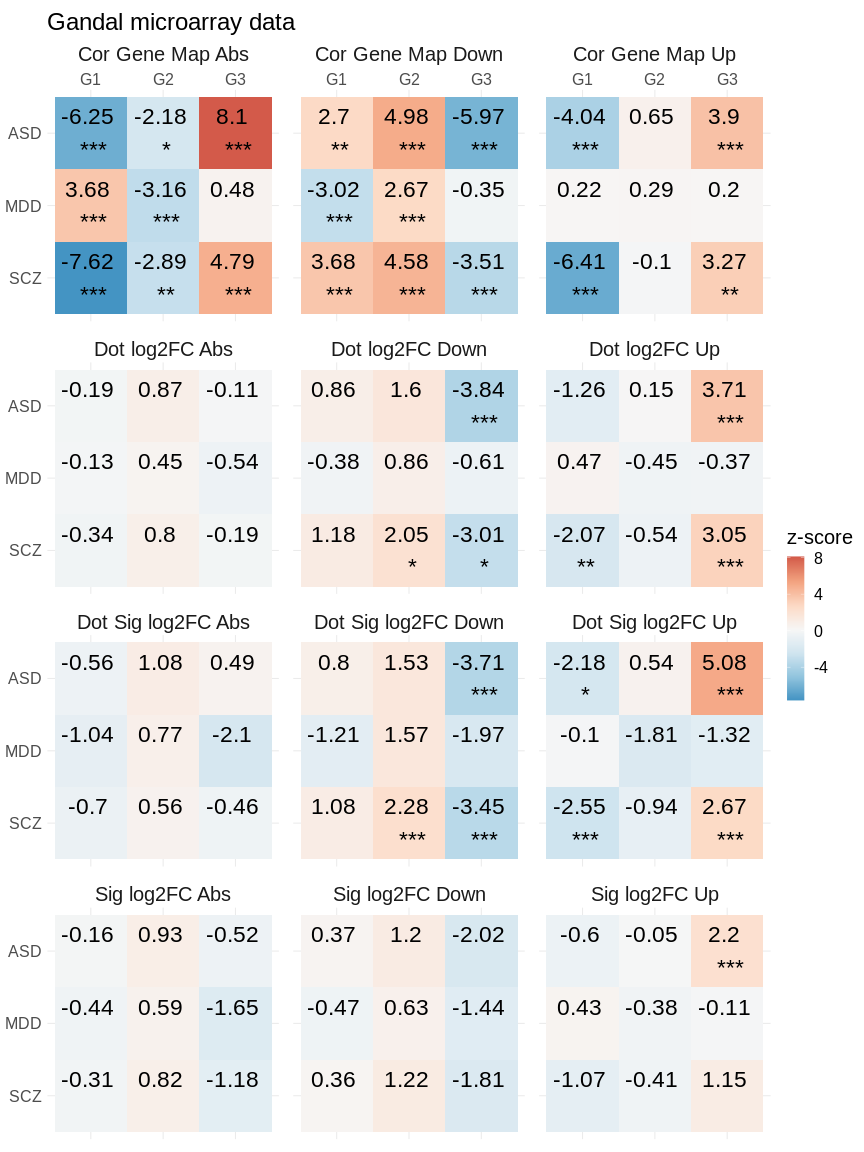

In [433]:
%%R -w 12 -h 16 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Gandal microarray data')

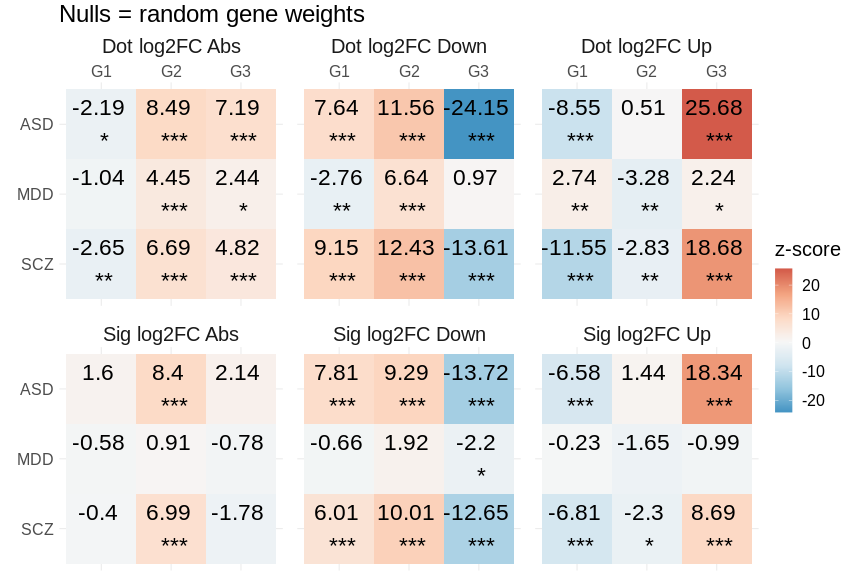

In [256]:
%%R -w 12 -h 8 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Nulls = random gene weights')

## Do map correlations with eigengene map

In [274]:
gandal_genes_micro = get_gandal_genes(which='microarray')
gandal_genes_rna = get_gandal_genes(which='rnaseq')

In [291]:
null_p_versions_dict = {
    'Microarray': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='abs', method='mean')
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

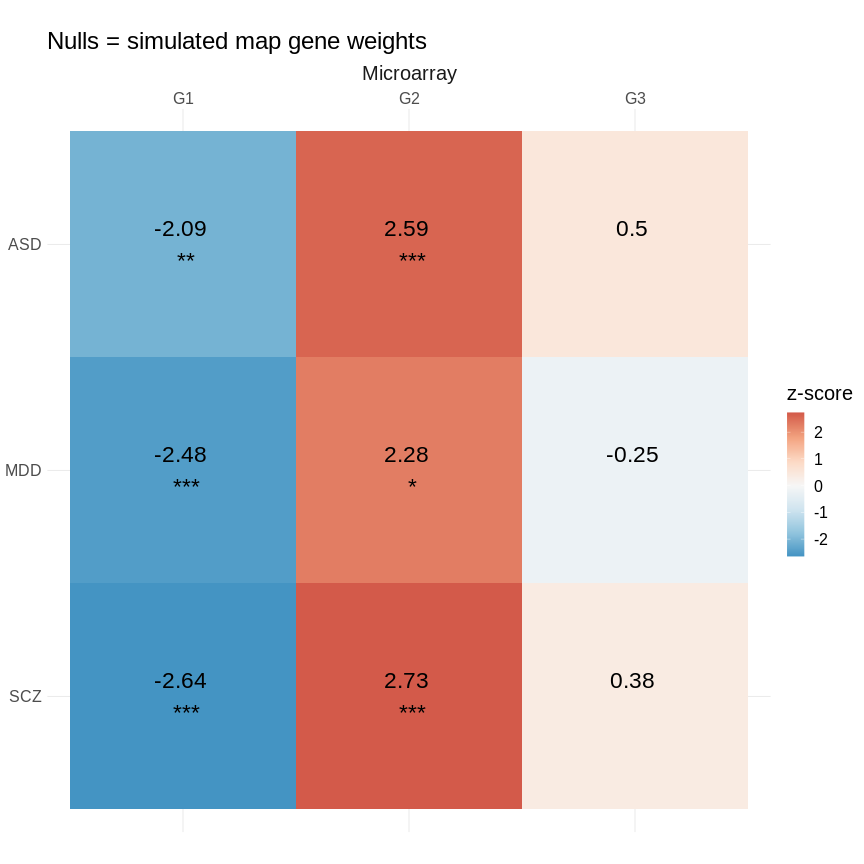

In [292]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Nulls = simulated map gene weights')